<a id="description"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173  ; overflow:hidden"><b>Project Description</b></div>

<div style="padding: 20px; border-color: #50A20E; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #50A20E;">
    <p>
        This project aims to analyze student performance and behavior using ETL  Exploratory Data Analysis (EDA), and Machine Learning (ML) & Deep Learning (DL) techniques. It provides a comprehensive analysis of key factors affecting student academic success. Through various visualizations, statistical analyses, and predictive modeling techniques, we explore important insights and answer critical questions, including:
    </p>
    
   - **How are grades distributed across different departments?**  
     📊 *Grades Distribution by Department*  
     
   - **What is the relationship between age and gender in the student population?**  
     📊 *Distribution of Age by Gender*  
     
   - **How do stress levels correlate with total scores?**  
     📊 *KDE of Stress Level and Total Score*  
     
   - **How is family income level distributed across students with different extracurricular activities?**  
     📊 *Student Distribution in Terms of Family Income Level for Each Extracurricular Activity*  
     
   - **What is the distribution of parent education levels within each department?**  
     📊 *Count of Parent Education Level in Each Department*  
     
   - **How do grades vary based on factors like gender, internet access, parent education, and family income?**  
     📊 *Distribution of Grades in Terms of Gender, Internet Access at Home, Parent Education Level, and Family Income Level*  
     
   - **How does the relationship between total score and study hours vary by department?**  
     📊 *Relation Between Total Score and Study Hours per Week by Each Department*  
     
   - **Which students are studying the most per week?**  
     📊 *Top 10 Students Studying the Most Per Week*  
     
   - **How does department influence total score relationships?**  
     📊 *Influence of Department on Total Score Relations*  
     
   

   <p>
       - During data preprocessing, missing values were imputed using Linear Regression and Probabilities to ensure data completeness and accuracy.
   </p>

   <p>
       - To gain deeper insights, we developed predictive models to assess student performance. The project implements various Machine Learning (ML) and Deep Learning (DL) models, including:
   </p>

   <p>
    - Machine Learning Models: Logistic Regression, Random Forest, SVM, Naive Bayes, KNN, Decision Tree, AdaBoost, Gradient Boost, MLP Classifier, and XGBoost.
   </p>

   <p>
       - Deep Learning Model: Deep Neural Network (DNN).
   </p>

   <p>
       - The ultimate goal is to provide actionable insights that can help educators and institutions enhance student learning experiences and academic success. 🚀
   </p>
</div>


<a id="About"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173  ; overflow:hidden"><b>About Author</b></div>

<div style="padding: 20px; border-color: #50A20E; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #50A20E;">
    <p>
      I am <b>Amr Ghanem</b>, a 4th-year student at the Faculty of Engineering, Tanta University, with a passion for AI and Data Science. My journey into the world of technology is driven by curiosity and enthusiasm to explore the endless possibilities that data and AI offer. I am continuously learning and honing my skills in data analysis, machine learning, and AI to build a strong foundation for my future career. My goal is to contribute to innovative projects and make a meaningful impact in the tech industry.
    </p>
    <p>
        You can find more about me on my:<br>
        <a href="https://www.linkedin.com/in/amr-ghanem-306b392b9/" target="_blank">LinkedIn</a>.<br>
        <a href="https://www.kaggle.com/amrgghanem" target="_blank">Kaggle</a>.<br>
        Feel free to connect and reach out for any collaboration or queries!
    </p>
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Importing Libraries</b></div>

In [8]:
!pip install sklearn_features

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Preprocessing
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from imblearn.over_sampling import SMOTE

## Models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
## DNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,classification_report,accuracy_score,f1_score,precision_score,recall_score


import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Loading the Dataset</b></div>

In [11]:
df=pd.read_csv('../Student Performance & Behavior DataSet/Students_Grading_Dataset.csv')



In [12]:
df.head()

Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Engineering           52.29          55.03        57.82  ...   
1  Engineering           97.27          97.23        45.80  ...   
2     Business           57.19          67.05        93.68  ...   
3  Mathematics           95.15          47.79        80.63  ...   
4           CS           54.18          46.59        78.89  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           85.90        56.09      F                   6.2   
1           55.65        50.64      A                  19.0   
2           73.79        70.30      D                  20.7   
3           92.12        61.63      A                  24.8   
4           68.42        66.13      F                  15.4   

   Extracurricular_Activities Internet_Access_at_Home  Parent_Education_Level  \
0                          No                     Yes             High School   
1                          No                     Yes                     NaN   
2                          No                     Yes                Master's   
3                         Yes                     Yes             High School   
4                         Yes                     Yes             High School   

  Family_Income_Level Stress_Level (1-10) Sleep_Hours_per_Night  
0              Medium                   5                   4.7  
1              Medium                   4                   9.0  
2                 Low                   6                   6.2  
3                High                   3                   6.7  
4                High                   2                   7.1  

[5 rows x 23 columns]

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Data Info and Describtion</b></div>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [14]:
df.isna().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

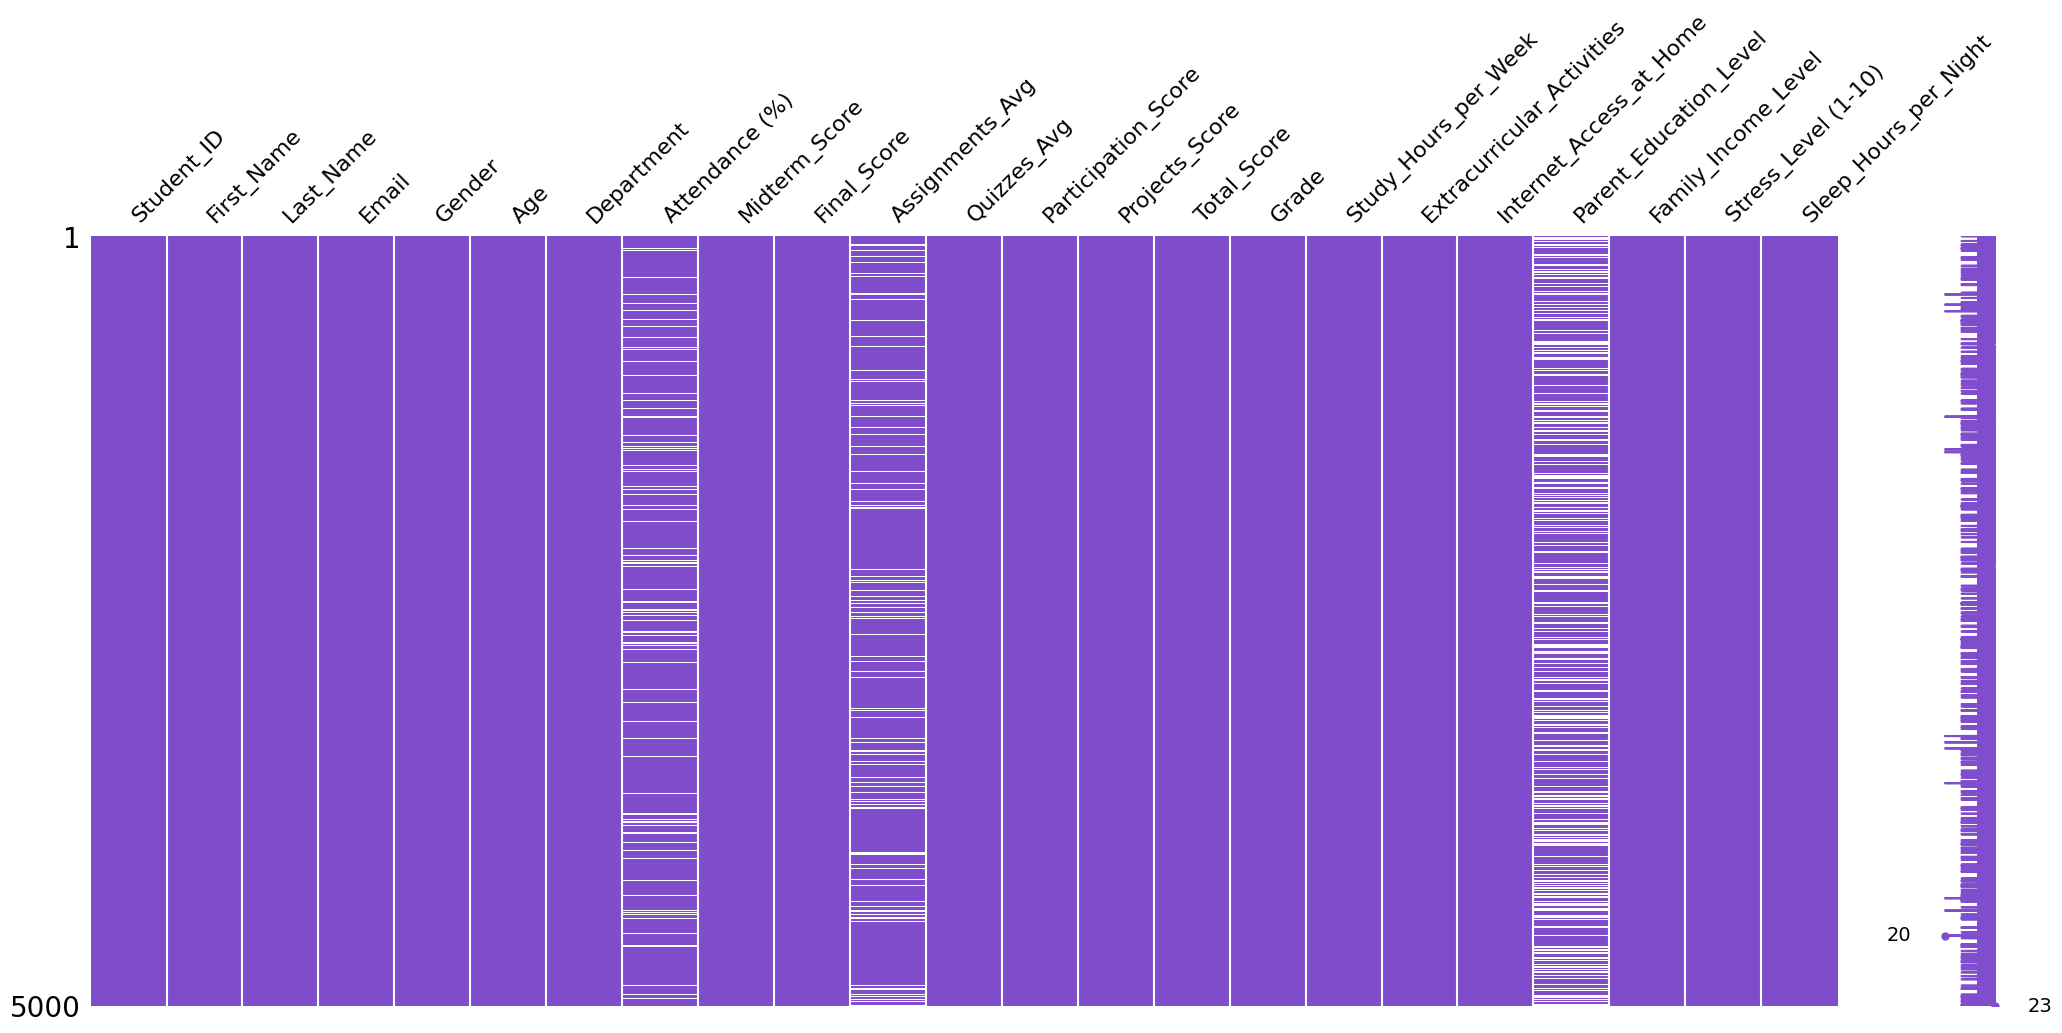

In [15]:
msno.matrix(df,color=(.5,0.3,0.8))
plt.show()

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

Age  Attendance (%)  Midterm_Score  Final_Score  \
count  5000.000000     4484.000000    5000.000000  5000.000000   
mean     21.048400       75.431409      70.326844    69.640788   
std       1.989786       14.372446      17.213209    17.238744   
min      18.000000       50.010000      40.000000    40.000000   
25%      19.000000       63.265000      55.457500    54.667500   
50%      21.000000       75.725000      70.510000    69.735000   
75%      23.000000       87.472500      84.970000    84.500000   
max      24.000000      100.000000      99.980000    99.980000   

       Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
count      4483.000000  5000.000000          5000.000000     5000.000000   
mean         74.798673    74.910728             4.980024       74.924860   
std          14.411799    14.504281             2.890136       14.423415   
min          50.000000    50.030000             0.000000       50.010000   
25%          62.090000    62.490000             2.440000       62.320000   
50%          74.810000    74.695000             4.955000       74.980000   
75%          86.970000    87.630000             7.500000       87.367500   
max          99.980000    99.960000            10.000000      100.000000   

       Total_Score  Study_Hours_per_Week  Stress_Level (1-10)  \
count  5000.000000           5000.000000           5000.00000   
mean     75.121804             17.658860              5.48080   
std      14.399941              7.275864              2.86155   
min      50.020000              5.000000              1.00000   
25%      62.835000             11.400000              3.00000   
50%      75.395000             17.500000              5.00000   
75%      87.652500             24.100000              8.00000   
max      99.990000             30.000000             10.00000   

       Sleep_Hours_per_Night  
count            5000.000000  
mean                6.488140  
std                 1.452283  
min                 4.000000  
25%                 5.200000  
50%                 6.500000  
75%                 7.700000  
max                 9.000000

In [18]:
for col in df.select_dtypes(include='object'):    ## Show Number of unique values in each column
    n=df[col].nunique()
    print(f"{col} ; {n}")

Student_ID ; 5000
First_Name ; 8
Last_Name ; 6
Email ; 5000
Gender ; 2
Department ; 4
Grade ; 5
Extracurricular_Activities ; 2
Internet_Access_at_Home ; 2
Parent_Education_Level ; 4
Family_Income_Level ; 3


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>ETL</b></div>

In [20]:
"""
The 'Assignments_Avg' has 517 missing values but wait i can't impute
it by mean or meadian because  The 'Total_Score' and 'Grades' are the summation of all the other columns including 'Assignments_Avg'
so the student can't be have Grade 'D' but after adding the fixed value to 'Assignments_Avg' he will actually have Grade 'A' !
so i will impute the missing values in 'Assignments_Avg' by using Linear Regression model it predict the missings 
"""


"""
or you can try to compute the average factor between the sum of all scores and the total score and then adjust the below equ to calculate the missings
"""

# reamainig_score=df['Total_Score']-(df['Midterm_Score']+df['Final_Score']+df['Quizzes_Avg']+df['Participation_Score']+df['Projects_Score'])

# df['Assignments_Avg']=df['Assignments_Avg'].fillna(reamainig_score)



"\nThe 'Assignments_Avg' has 517 missing values but wait i can't impute\nit by mean or meadian because  The 'Total_Score' and 'Grades' are the summation of all the other columns including 'Assignments_Avg'\nso the student can't be have Grade 'D' but after adding the fixed value to 'Assignments_Avg' he will actually have Grade 'A' !\nso i will impute the missing values in 'Assignments_Avg' by the remaining score after subtracting all the other columns from 'Total_Score'\n"

In [24]:
df_impute=df.drop(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)',  'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],axis=1)

In [25]:
df_impute_complete=df_impute.dropna(axis=0)   ### datafram with only the related features with Assignments_Avg
df_impute_complete

Midterm_Score  Final_Score  Assignments_Avg  Quizzes_Avg  \
0             55.03        57.82            84.22        74.06   
2             67.05        93.68            67.70        85.70   
3             47.79        80.63            66.06        93.51   
4             46.59        78.89            96.85        83.70   
5             78.85        43.53            71.40        52.20   
...             ...          ...              ...          ...   
4994          69.92        55.48            75.26        54.36   
4995          82.15        60.33            80.09        99.32   
4997          63.55        64.21            94.28        50.19   
4998          79.79        94.28            81.20        61.18   
4999          83.24        53.47            51.76        83.51   

      Participation_Score  Projects_Score  Total_Score  
0                    3.99           85.90        56.09  
2                    5.05           73.79        70.30  
3                    6.54           92.12        61.63  
4                    5.97           68.42        66.13  
5                    6.38           67.29        62.08  
...                   ...             ...          ...  
4994                 8.03           64.36        55.88  
4995                 5.00           58.42        85.21  
4997                 3.13           82.65        54.25  
4998                 0.40           94.29        55.84  
4999                 0.49           69.25        77.86  

[4483 rows x 7 columns]

In [26]:
df_impute_missing=df_impute[df_impute['Assignments_Avg'].isnull()] ## The instances that have Assignments_Avg missings
df_impute_missing

Midterm_Score  Final_Score  Assignments_Avg  Quizzes_Avg  \
1             97.23        45.80              NaN        94.24   
20            69.94        46.70              NaN        84.38   
55            52.50        50.77              NaN        97.27   
61            94.72        93.70              NaN        79.49   
76            70.22        66.31              NaN        62.41   
...             ...          ...              ...          ...   
4978          85.05        99.24              NaN        80.59   
4985          81.72        71.21              NaN        66.87   
4991          59.68        63.09              NaN        56.92   
4992          61.44        64.59              NaN        50.11   
4996          86.31        49.80              NaN        88.08   

      Participation_Score  Projects_Score  Total_Score  
1                    8.32           55.65        50.64  
20                   7.72           74.07        88.47  
55                   7.79           81.44        88.76  
61                   6.06           57.93        88.60  
76                   5.81           56.51        58.85  
...                   ...             ...          ...  
4978                 9.33           74.52        54.35  
4985                 1.08           79.30        70.75  
4991                 2.32           81.30        89.55  
4992                 3.53           80.08        62.51  
4996                 2.79           60.87        95.96  

[517 rows x 7 columns]

In [28]:
features=['Midterm_Score', 'Final_Score', 'Quizzes_Avg',
       'Participation_Score', 'Projects_Score', 'Total_Score']

In [29]:
X=df_impute_complete.drop('Assignments_Avg',axis=1)
y=df_impute_complete['Assignments_Avg']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3586, 6), (3586,), (897, 6), (897,))

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

In [32]:
y_pred=model.predict(X_test)

In [33]:
y_pred.shape

(897,)

In [34]:
rmse_lin=(mean_squared_error(y_test,y_pred))**0.5
amse_lin=mean_absolute_error(y_test,y_pred)



print(f'RMSE   -----> {rmse_lin:0.2f} ')
print(f'AMSE   -----> {amse_lin:0.2f} ')


RMSE   -----> 14.43 
AMSE   -----> 12.46 


In [35]:
df_impute_missing['Assignments_Avg']=model.predict(df_impute_missing[features])

In [38]:
df_impute=pd.concat([df_impute_missing,df_impute_complete]).sort_index()
df_impute

Midterm_Score  Final_Score  Assignments_Avg  Quizzes_Avg  \
0             55.03        57.82        84.220000        74.06   
1             97.23        45.80        74.710719        94.24   
2             67.05        93.68        67.700000        85.70   
3             47.79        80.63        66.060000        93.51   
4             46.59        78.89        96.850000        83.70   
...             ...          ...              ...          ...   
4995          82.15        60.33        80.090000        99.32   
4996          86.31        49.80        74.355542        88.08   
4997          63.55        64.21        94.280000        50.19   
4998          79.79        94.28        81.200000        61.18   
4999          83.24        53.47        51.760000        83.51   

      Participation_Score  Projects_Score  Total_Score  
0                    3.99           85.90        56.09  
1                    8.32           55.65        50.64  
2                    5.05           73.79        70.30  
3                    6.54           92.12        61.63  
4                    5.97           68.42        66.13  
...                   ...             ...          ...  
4995                 5.00           58.42        85.21  
4996                 2.79           60.87        95.96  
4997                 3.13           82.65        54.25  
4998                 0.40           94.29        55.84  
4999                 0.49           69.25        77.86  

[5000 rows x 7 columns]

In [39]:
df_impute['Student_ID']=df['Student_ID']

In [40]:
df=df.drop(columns=['Assignments_Avg']).merge(                               ## Merging the dataframes after removing the old missing feature
    df_impute[["Student_ID","Assignments_Avg"]],on='Student_ID',how='left'
)

In [41]:
df

Student_ID First_Name Last_Name                       Email  Gender  Age  \
0         S1000       Omar  Williams     student0@university.com  Female   22   
1         S1001      Maria     Brown     student1@university.com    Male   18   
2         S1002      Ahmed     Jones     student2@university.com    Male   24   
3         S1003       Omar  Williams     student3@university.com  Female   24   
4         S1004       John     Smith     student4@university.com  Female   23   
...         ...        ...       ...                         ...     ...  ...   
4995      S5995      Ahmed     Jones  student4995@university.com    Male   19   
4996      S5996       Emma     Brown  student4996@university.com    Male   19   
4997      S5997       John     Brown  student4997@university.com  Female   24   
4998      S5998       Sara     Davis  student4998@university.com    Male   23   
4999      S5999      Maria     Brown  student4999@university.com  Female   21   

       Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0     Engineering           52.29          55.03        57.82  ...   
1     Engineering           97.27          97.23        45.80  ...   
2        Business           57.19          67.05        93.68  ...   
3     Mathematics           95.15          47.79        80.63  ...   
4              CS           54.18          46.59        78.89  ...   
...           ...             ...            ...          ...  ...   
4995     Business             NaN          82.15        60.33  ...   
4996     Business           65.11          86.31        49.80  ...   
4997           CS           87.54          63.55        64.21  ...   
4998           CS           92.56          79.79        94.28  ...   
4999  Engineering           83.92          83.24        53.47  ...   

      Total_Score  Grade  Study_Hours_per_Week  Extracurricular_Activities  \
0           56.09      F                   6.2                          No   
1           50.64      A                  19.0                          No   
2           70.30      D                  20.7                          No   
3           61.63      A                  24.8                         Yes   
4           66.13      F                  15.4                         Yes   
...           ...    ...                   ...                         ...   
4995        85.21      D                  25.5                          No   
4996        95.96      C                   5.0                          No   
4997        54.25      A                  24.8                         Yes   
4998        55.84      A                  16.1                         Yes   
4999        77.86      F                  29.2                          No   

     Internet_Access_at_Home  Parent_Education_Level Family_Income_Level  \
0                        Yes             High School              Medium   
1                        Yes                     NaN              Medium   
2                        Yes                Master's                 Low   
3                        Yes             High School                High   
4                        Yes             High School                High   
...                      ...                     ...                 ...   
4995                     Yes             High School                 Low   
4996                     Yes                     NaN              Medium   
4997                      No             High School              Medium   
4998                     Yes              Bachelor's                 Low   
4999                     Yes                     PhD                 Low   

     Stress_Level (1-10) Sleep_Hours_per_Night Assignments_Avg  
0                      5                   4.7       84.220000  
1                      4                   9.0       74.710719  
2                      6                   6.2       67.700000  
3                      3                   6.7       66.060000  
4               

In [42]:
df.describe()

Age  Attendance (%)  Midterm_Score  Final_Score  Quizzes_Avg  \
count  5000.000000     4484.000000    5000.000000  5000.000000  5000.000000   
mean     21.048400       75.431409      70.326844    69.640788    74.910728   
std       1.989786       14.372446      17.213209    17.238744    14.504281   
min      18.000000       50.010000      40.000000    40.000000    50.030000   
25%      19.000000       63.265000      55.457500    54.667500    62.490000   
50%      21.000000       75.725000      70.510000    69.735000    74.695000   
75%      23.000000       87.472500      84.970000    84.500000    87.630000   
max      24.000000      100.000000      99.980000    99.980000    99.960000   

       Participation_Score  Projects_Score  Total_Score  Study_Hours_per_Week  \
count          5000.000000     5000.000000  5000.000000           5000.000000   
mean              4.980024       74.924860    75.121804             17.658860   
std               2.890136       14.423415    14.399941              7.275864   
min               0.000000       50.010000    50.020000              5.000000   
25%               2.440000       62.320000    62.835000             11.400000   
50%               4.955000       74.980000    75.395000             17.500000   
75%               7.500000       87.367500    87.652500             24.100000   
max              10.000000      100.000000    99.990000             30.000000   

       Stress_Level (1-10)  Sleep_Hours_per_Night  Assignments_Avg  
count           5000.00000            5000.000000      5000.000000  
mean               5.48080               6.488140        74.801438  
std                2.86155               1.452283        13.646789  
min                1.00000               4.000000        50.000000  
25%                3.00000               5.200000        63.687500  
50%                5.00000               6.500000        74.829751  
75%                8.00000               7.700000        85.570000  
max               10.00000               9.000000        99.980000

In [21]:
## Calculated the mean of The Attendence for each Department

AVG_ATTEN_DEP=df.groupby('Department')['Attendance (%)'].mean()


In [22]:
##Check the attendence for each department instance
AVG_ATTEN_DEP[df['Department']]

Department
Engineering    76.149621
Engineering    76.149621
Business       75.361619
Mathematics    75.681185
CS             74.885055
                 ...    
Business       75.361619
Business       75.361619
CS             74.885055
CS             74.885055
Engineering    76.149621
Name: Attendance (%), Length: 5000, dtype: float64

In [43]:
## Now Filling Missing Values Only in 'Attendance (%)' column with the mean of the department using apply function

df['Attendance (%)']=df.apply(lambda row: AVG_ATTEN_DEP[row['Department']] if pd.isnull(row['Attendance (%)']) else row['Attendance (%)'] ,axis=1)

In [44]:
df['Attendance (%)'].isnull().sum()

0

In [45]:
"""
Here we can see that the distribution of the 'Parent_Education_Level' column is almost balanced
and there is no a supreme majority of a certain value so we can fill the missing values with the mode (most frequent) of the column

"""

value_counts = df['Parent_Education_Level'].value_counts(normalize=True)
print(f"Value Counts Are : {value_counts*100}")


Value Counts Are : Parent_Education_Level
PhD            25.577043
Bachelor's     25.265128
High School    24.828447
Master's       24.329382
Name: proportion, dtype: float64


In [46]:
"""
So we can Make Random Sampling from the values of the column based on the distribution of the values
and fill the missing values with the sampled values To Maintain The Default Distribution of the column

"""

missing_Locations=df['Parent_Education_Level'].isnull()  # Locations of The missing values
num_missing=df['Parent_Education_Level'].isnull().sum() # number of missing values to make samples as the same as the missing values
Rand_sampled_values=np.random.choice(
    value_counts.index.to_list(), ## The Categories of the desired Samples
    size=num_missing, ## The Number of the desired Samples
    p=value_counts.values ## The Distribution of the Categories based on the value_counts
)

df.loc[missing_Locations,'Parent_Education_Level']=Rand_sampled_values  ## Fill the missing values with the sampled values


In [48]:
## Creating New Features

df['S_Full_Name']=df['First_Name']+" "+ df['Last_Name']

df['Final-Mid ratio']=df['Final_Score'] / df['Midterm_Score	']
df['Score-Study Hours ratio']=df['Total_Score'] / df['Study_Hours_per_Week']
df['Study-sleep ratio']=df['Study_Hours_per_Week']/ (df['Sleep_Hours_per_Night']*7)
df['S_Full_Name']

0       Omar Williams
1         Maria Brown
2         Ahmed Jones
3       Omar Williams
4          John Smith
            ...      
4995      Ahmed Jones
4996       Emma Brown
4997       John Brown
4998       Sara Davis
4999      Maria Brown
Name: S_Full_Name, Length: 5000, dtype: object

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>EDA</b></div>

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Uni-Visualization</b></div>

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>General Distributions</b></div>

### Histogram of The DataFrame

<Figure size 400x300 with 0 Axes>

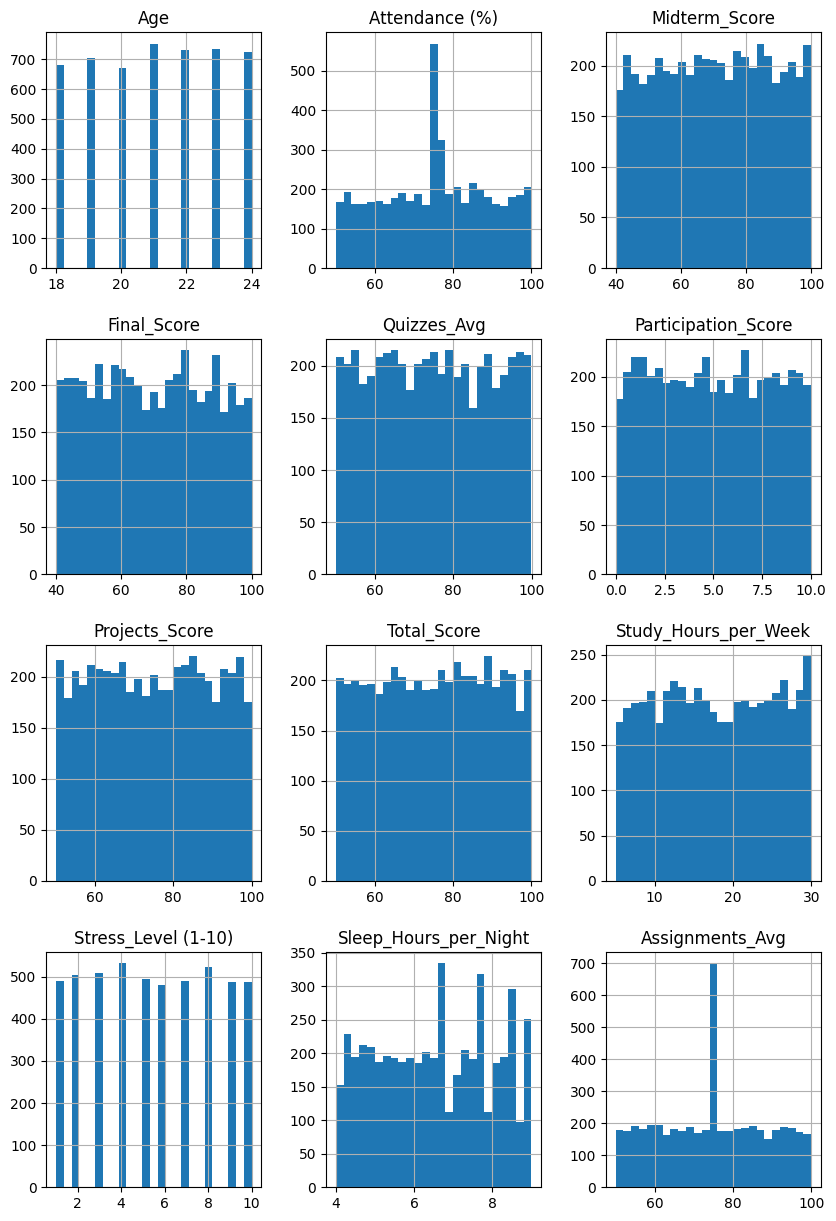

In [50]:
plt.figure(figsize=(4,3))
df.hist(bins=25,figsize=(10,15))
plt.show()

### Density of The Data

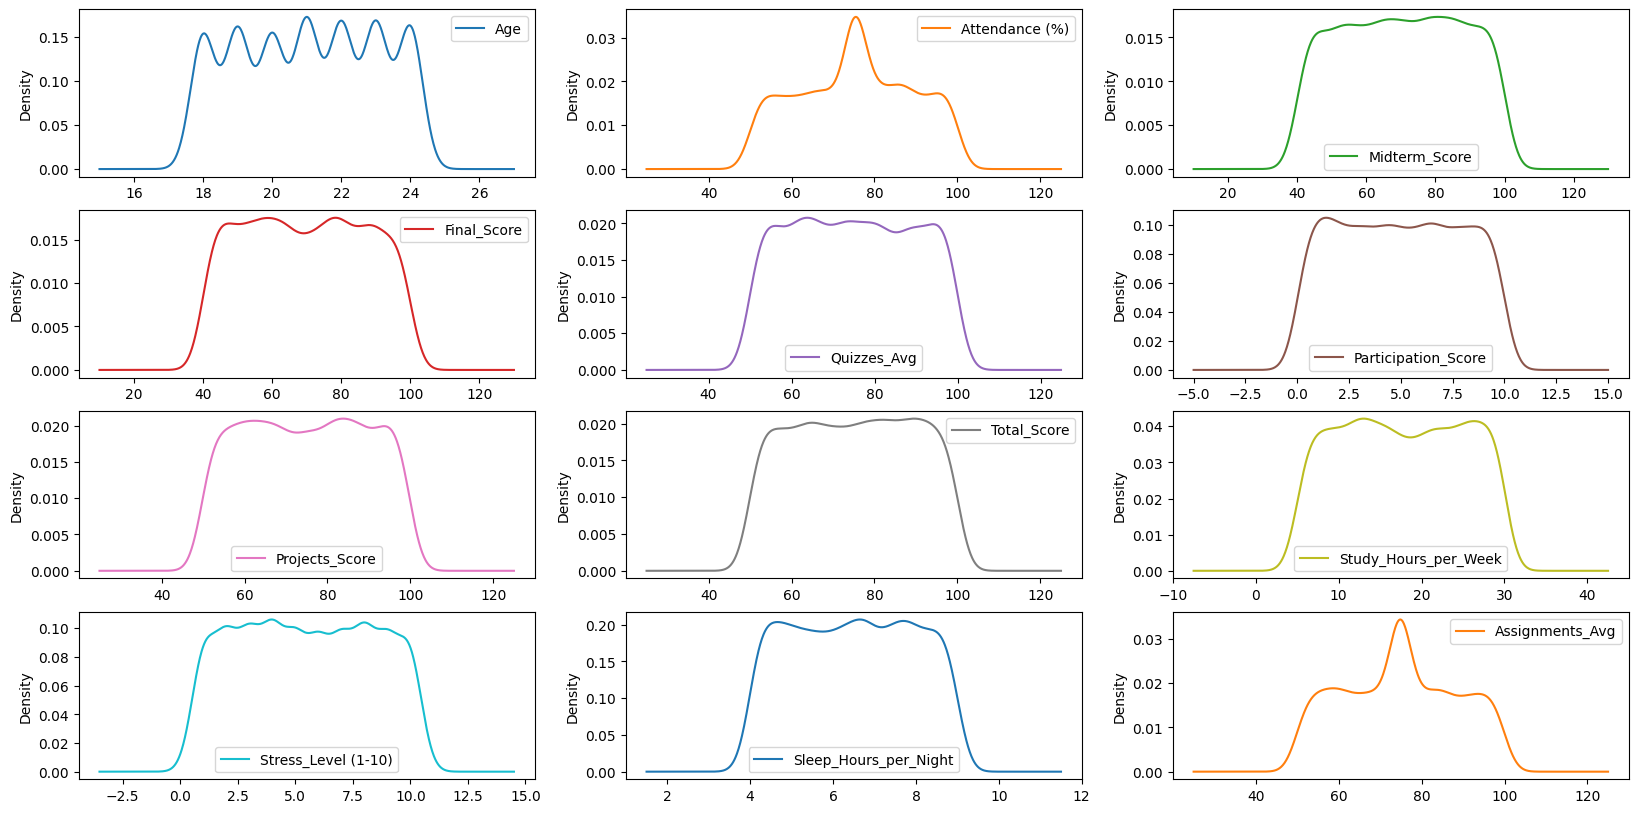

In [51]:
df.plot(kind='density',subplots=True,layout=(4,3),sharex=False,figsize=(20,10))
plt.show()

### Distribution of Departments,Grades,Gender,Family Income Level



In [52]:
Dep_Des=df['Department'].value_counts()
Dep_Des=pd.DataFrame(Dep_Des)
Dep_Des



count
Department        
CS            2022
Engineering   1469
Business      1006
Mathematics    503

In [53]:
Gen_Des=df['Gender'].value_counts()
Gen_Des=pd.DataFrame(Gen_Des)
Gen_Des

count
Gender       
Male     2551
Female   2449

<Figure size 400x300 with 0 Axes>

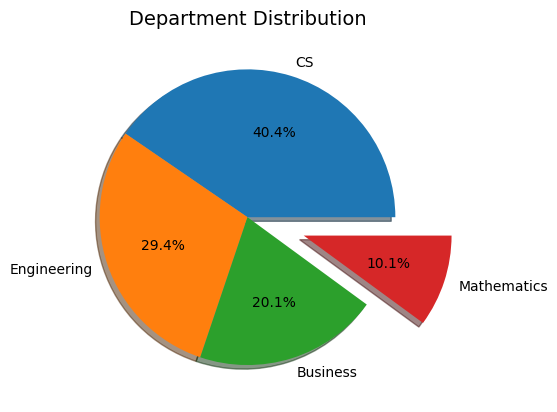

In [54]:
plt.figure(figsize=(4,3))

fig1,ax1=plt.subplots()
ax1.pie(Dep_Des.values.squeeze(),labels=Dep_Des.index,autopct="%1.1f%%",explode=(0,0,0,0.4),shadow=True)
plt.title("Department Distribution",fontsize=14,color='k')



# fig2,ax2=plt.subplots()
# ax2.pie(Gen_Des.values.squeeze(),labels=Gen_Des.index,autopct="%1.1f%%",shadow=True,explode=(0,0.1))
# plt.title("Gender Distribution",fontsize=14,color='k')




plt.show()

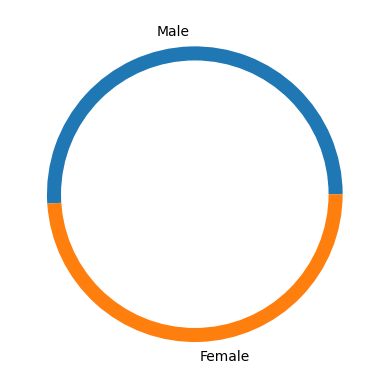

In [55]:
my_circle=plt.Circle((0,0),0.9,color='white')
plt.pie(df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [56]:
Grade_Des=df['Grade'].value_counts()
Grade_Des=pd.DataFrame(Grade_Des)
Grade_Des

count
Grade       
A       1495
B        978
D        889
F        844
C        794

In [57]:
Fam_In_Des=df['Family_Income_Level'].value_counts()
Fam_In_Des=pd.DataFrame(Fam_In_Des)
Fam_In_Des

count
Family_Income_Level       
Low                   1983
Medium                1973
High                  1044

In [58]:
def plot_count(x,data,hue,title):

    s=sns.countplot(x=x,data=df,hue=hue)
    plt.title(title,fontsize=14,color='k')
    plt.xlabel(x,fontsize=14,color='k')


    for p in s.patches:
        height=p.get_height() ## The Height of the patch

        s.text(p.get_x()+p.get_width()/2.,    ##Horizontal cordinate of the text
               height+10,                     ##Vertical cordinate of the text
               '{:.2f}%'.format(height/len(df)*100),             ## Shape of Dispaly Values
               ha='center',fontsize=6


        )

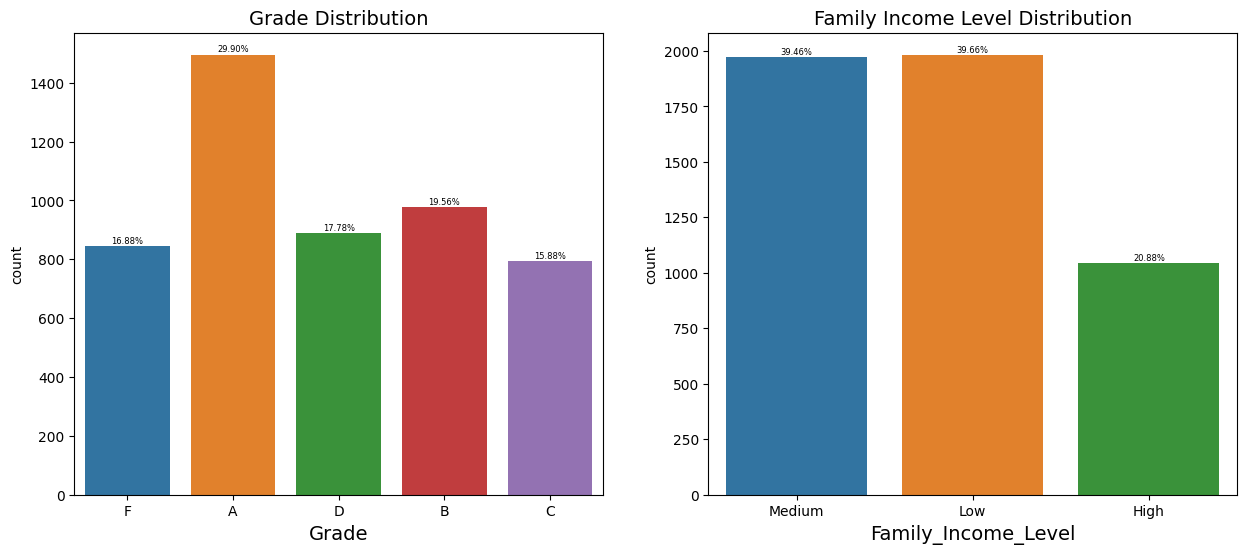

In [59]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_count(x='Grade',data=df,hue='Grade',title="Grade Distribution")

# sns.countplot(x='Grade',data=df,hue='Grade')
# plt.title('Grade Distribution',fontsize=14,color='k')
# plt.xlabel("Grade",fontsize=14,color='k')
# plt.ylabel("Count",fontsize=14,color='k')

plt.subplot(1,2,2)
plot_count(x='Family_Income_Level',data=df,hue='Family_Income_Level',title="Family Income Level Distribution")


# sns.countplot(x='Family_Income_Level',data=df,hue='Family_Income_Level')
# plt.title('Family Income Level Distribution',fontsize=14,color='k')
# plt.xlabel("Family Income Level",fontsize=14,color='k')
# plt.ylabel("Count",fontsize=14,color='k')

### Distribution of Gender & Internet Access at Home

In [60]:
Gend_Des=df['Gender'].value_counts()
Gend_Des=pd.DataFrame(Gend_Des)
Gend_Des

count
Gender       
Male     2551
Female   2449

In [61]:
Inter_Des=df['Internet_Access_at_Home'].value_counts()
Inter_Des=pd.DataFrame(Inter_Des)
Inter_Des

count
Internet_Access_at_Home       
Yes                       4485
No                         515

Text(0, 0.5, 'Internet Access')

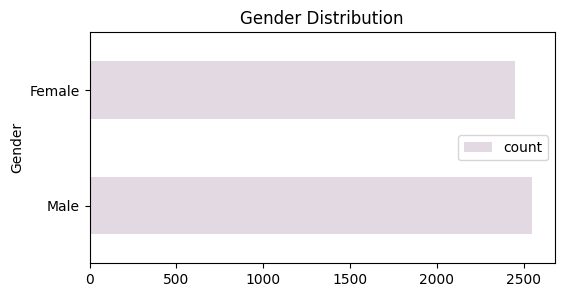

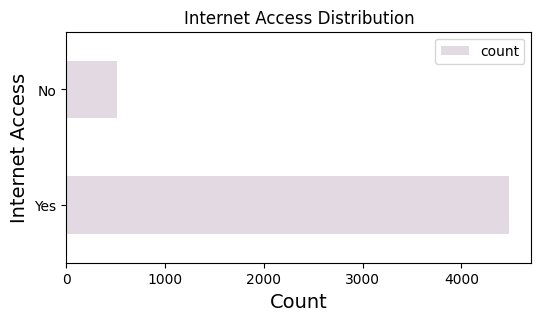

In [62]:
# plt.subplot(1,2,1)
Gend_Des.plot(kind='barh',figsize=(6,3),title='Gender Distribution',colormap='twilight')
# plt.subplot(1,2,2)
Inter_Des.plot(kind='barh',figsize=(6,3),title='Internet Access Distribution',colormap='twilight')
plt.xlabel("Count",fontsize=14,color='k')
plt.ylabel("Internet Access",fontsize=14,color='k')

## Age & Gender Distribution

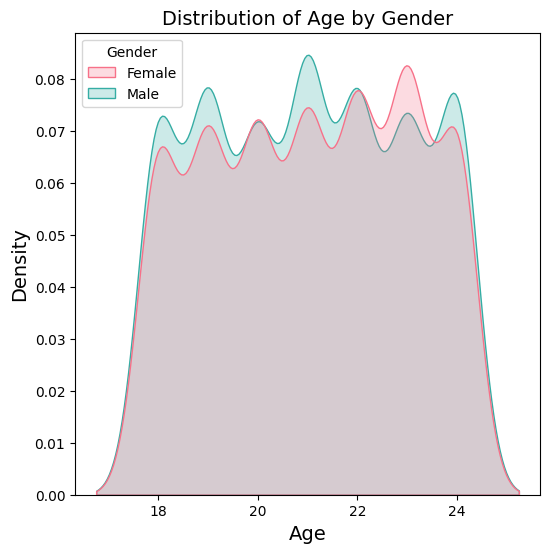

In [80]:
plt.figure(figsize=(6,6))
sns.kdeplot(x='Age',data=df,hue="Gender",fill=True,palette='husl')
plt.title('Distribution of Age by Gender',fontsize=14,color='k')
plt.xlabel("Age",fontsize=14,color='k')
plt.ylabel("Density",fontsize=14,color='k')
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Department & Student Characteristics</b></div>

### Average age in each Department

In [63]:
pd.DataFrame(df.groupby(['Department'])['Age'].agg('mean').sort_values(ascending=False))

Age
Department            
CS           21.069238
Engineering  21.049013
Mathematics  21.043738
Business     21.007952

### Grades Student Numbers in Each Department

In [64]:
df.pivot_table(index='Department',columns='Grade',values='Student_ID',aggfunc='count')

Grade          A    B    C    D    F
Department                          
Business     291  197  174  168  176
CS           596  384  323  366  353
Engineering  474  295  208  258  234
Mathematics  134  102   89   97   81

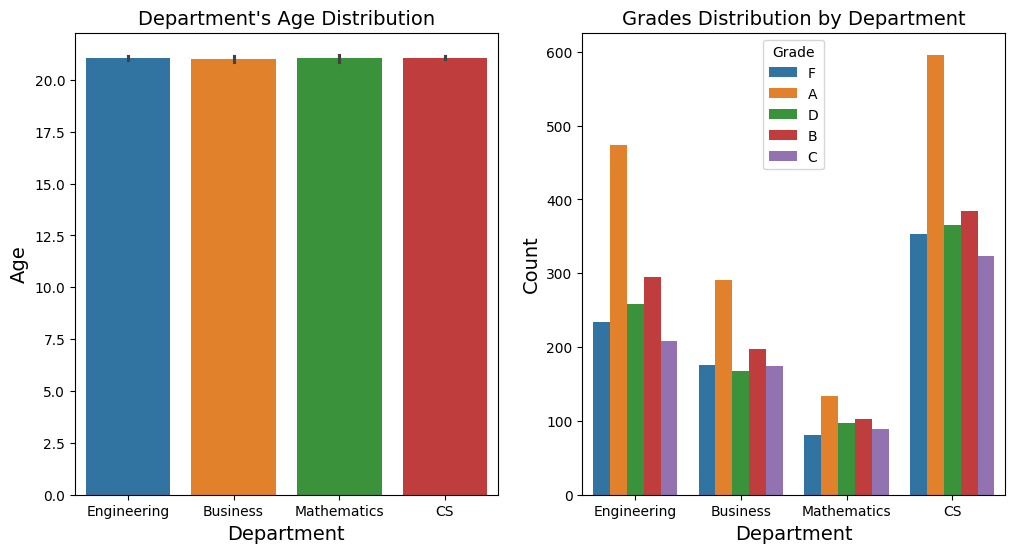

In [65]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x='Department',y='Age',data=df,estimator=np.mean,hue='Department')
plt.title("Department's Age Distribution",fontsize=14,color='k')
plt.xlabel("Department",fontsize=14,color='k')
plt.ylabel("Age",fontsize=14,color='k')

plt.subplot(1,2,2)
sns.countplot(x='Department',data=df,hue='Grade')
plt.title("Grades Distribution by Department",fontsize=14,color='k')
plt.xlabel("Department",fontsize=14,color='k')
plt.ylabel("Count",fontsize=14,color='k')

plt.show()

### Most Departments Where Students Have Extracurricular Activities

In [66]:
df.pivot_table(index='Department',columns='Extracurricular_Activities',values='Student_ID',aggfunc='count')

Extracurricular_Activities    No  Yes
Department                           
Business                     706  300
CS                          1411  611
Engineering                 1032  437
Mathematics                  344  159

Text(0, 0.5, 'Department')

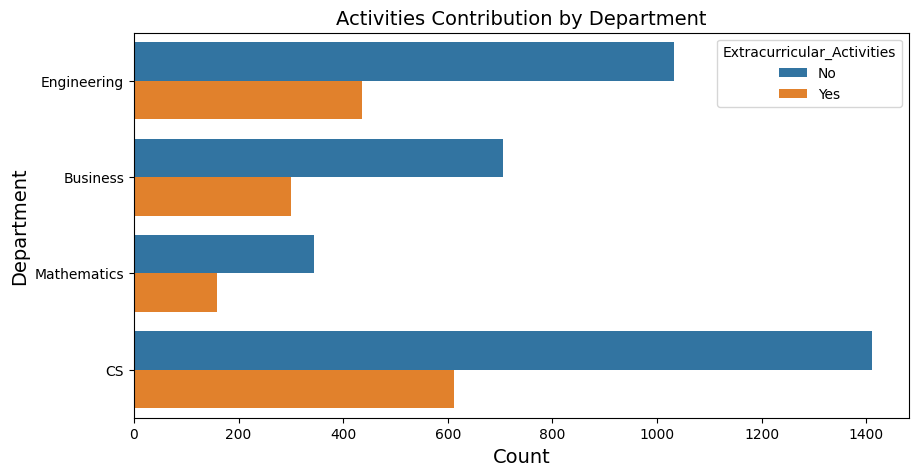

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(y='Department',data=df,hue='Extracurricular_Activities')
plt.title("Activities Contribution by Department",fontsize=14,color='k')
plt.xlabel("Count",fontsize=14,color='k')
plt.ylabel("Department",fontsize=14,color='k')

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Total Score Relations (Averages)</b></div>

In [68]:
def  plot_box(x,y,data,hue,title):

    sns.boxplot(x=x,y=y,data=data,hue=hue)
    sns.stripplot(x=x,y=y,data=data,hue=hue)   ## For Displaying DataPoints on The box   (optional)
    plt.title(title,fontsize=14,color='k')
    plt.xlabel(x,fontsize=14,color='k')
    plt.ylabel(y,fontsize=14,color='k')



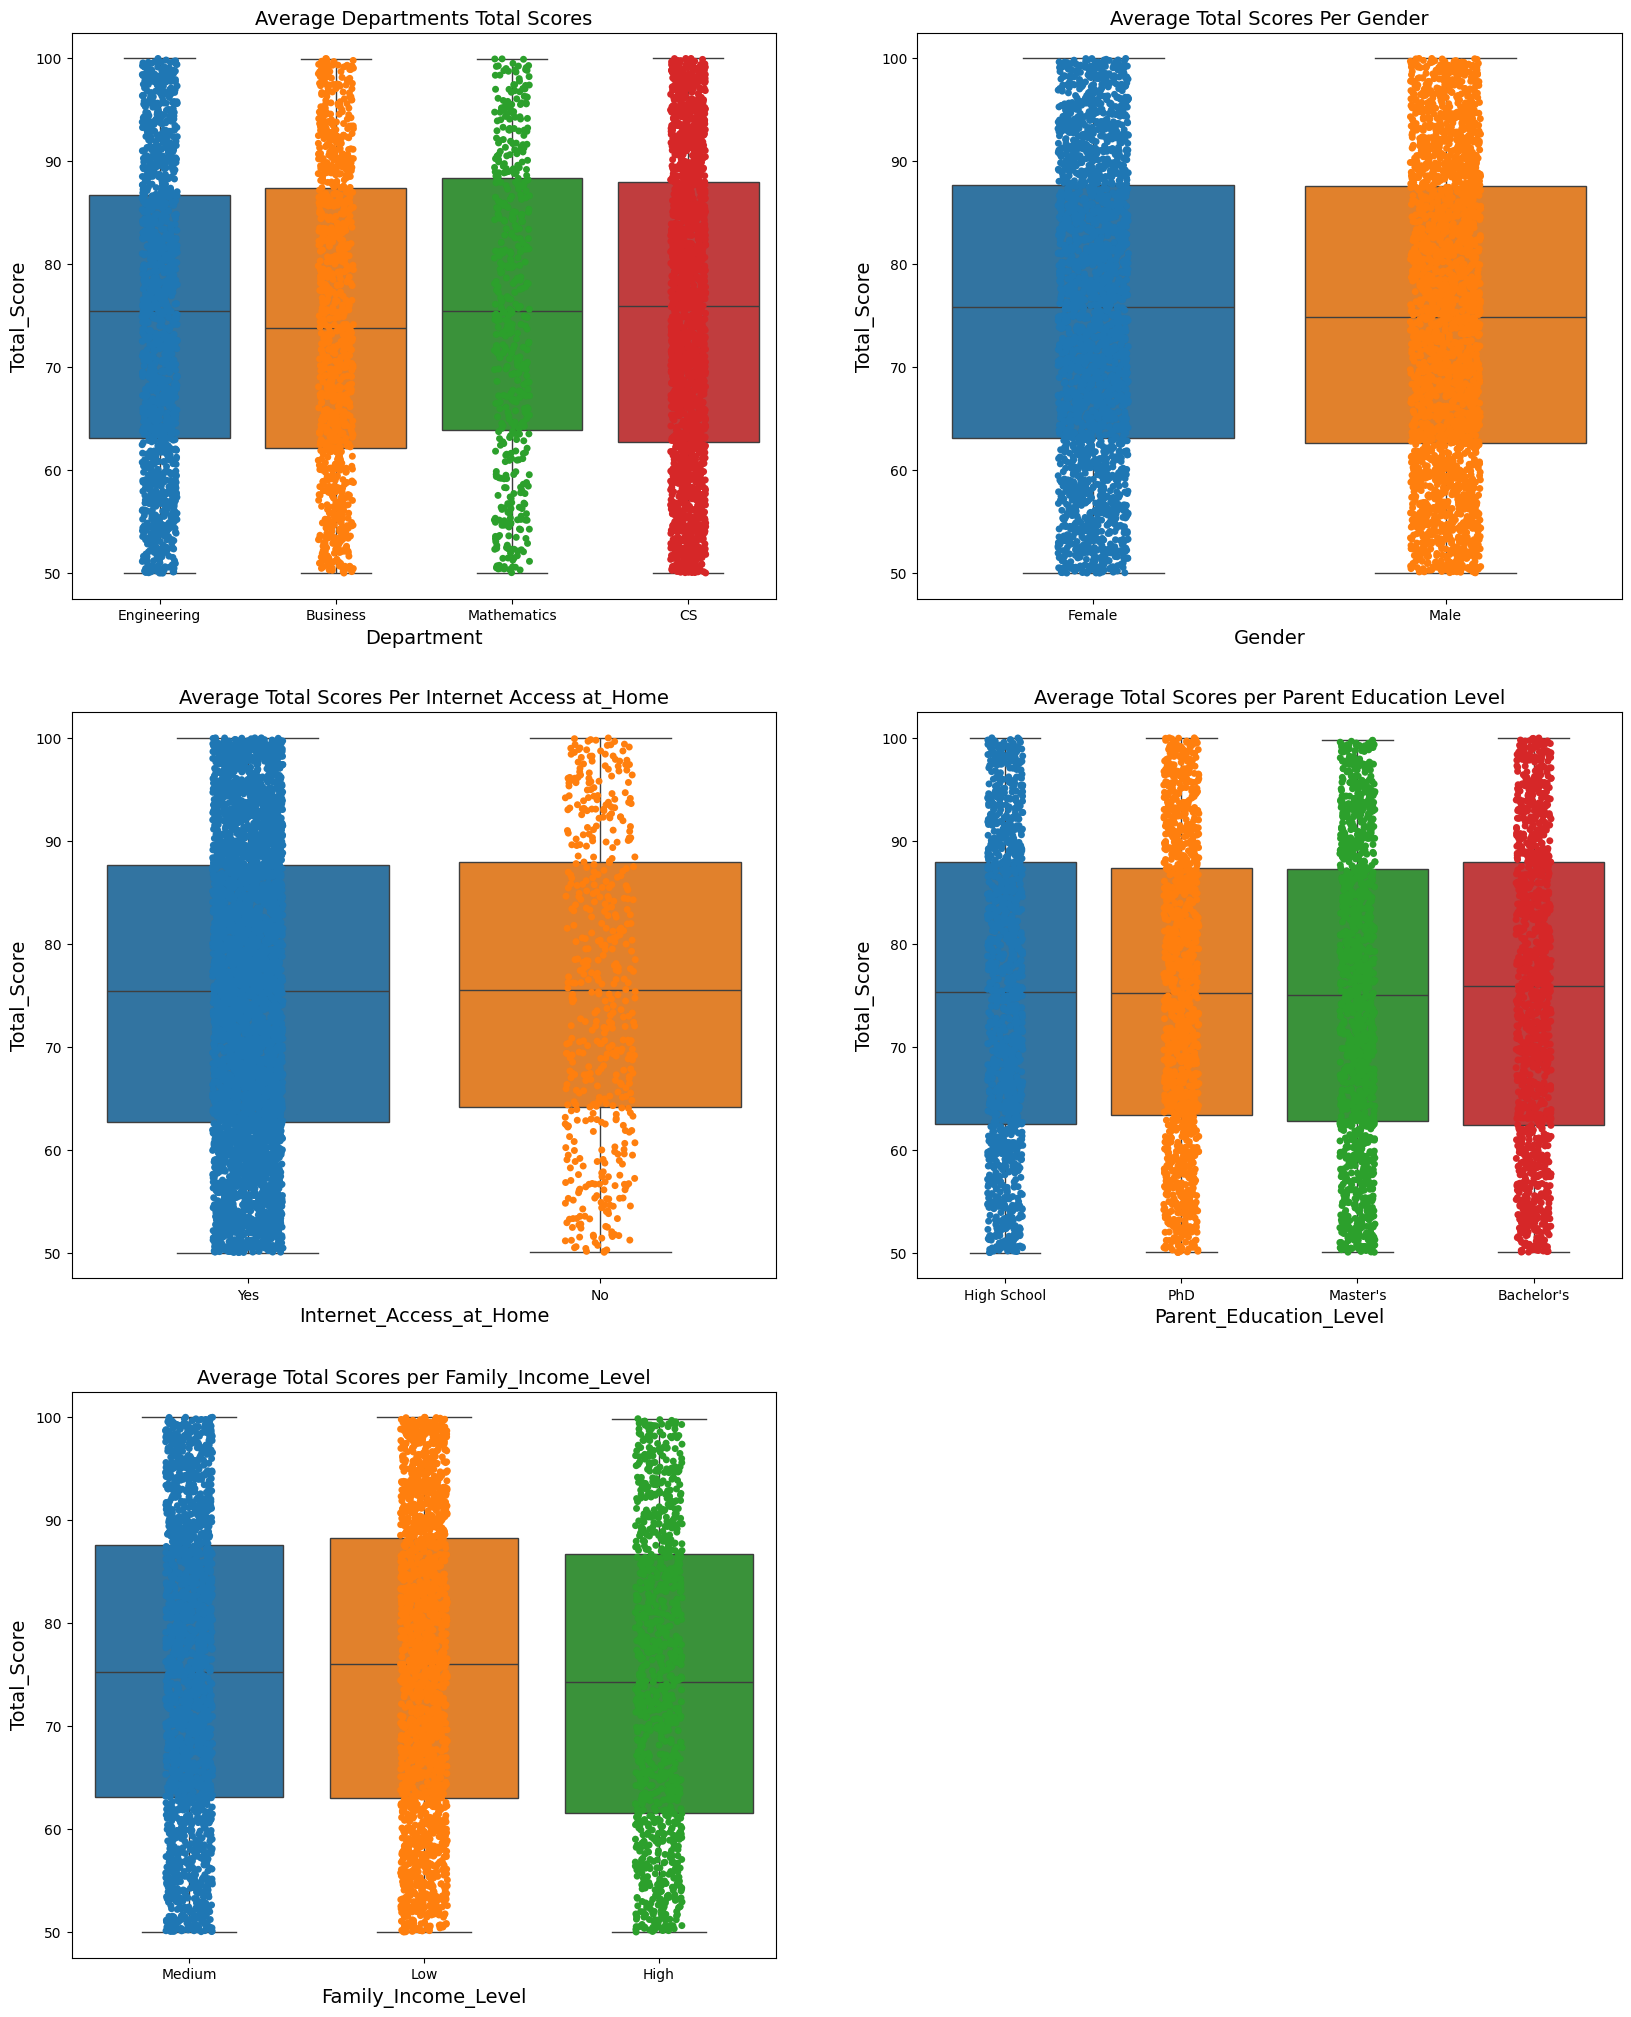

In [69]:
plt.figure(figsize=(20,25))
#Average Departments Total Scores
plt.subplot(3,2,1)
plot_box(x="Department",y='Total_Score',data=df,hue="Department",title='Average Departments Total Scores')
#Average Total Scores Per Gender
plt.subplot(3,2,2)
plot_box(x="Gender",y='Total_Score',data=df,hue="Gender",title='Average Total Scores Per Gender')
#Average Total Scores Per Internet Access at_Home
plt.subplot(3,2,3)
plot_box(x="Internet_Access_at_Home",y='Total_Score',data=df,hue="Internet_Access_at_Home",title='Average Total Scores Per Internet Access at_Home')
#Average Total Scores per Parent Education Level
plt.subplot(3,2,4)
plot_box(x="Parent_Education_Level",y='Total_Score',data=df,hue="Parent_Education_Level",title='Average Total Scores per Parent Education Level')
#Average Total Scores per Family_Income_Level
plt.subplot(3,2,5)
plot_box(x="Family_Income_Level",y='Total_Score',data=df,hue="Family_Income_Level",title='Average Total Scores per Family_Income_Level')






<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Student Performance Rankings</b></div>

### Top 10 Students in Terms of Total Score


In [70]:
top_10_S_Scores=df.sort_values('Total_Score',ascending=False)[:10]
pd.pivot_table(index='S_Full_Name',data=top_10_S_Scores,aggfunc='mean',values='Total_Score').sort_values('Total_Score',ascending=False)

Total_Score
S_Full_Name                
Ahmed Williams       99.990
Ali Brown            99.990
Ali Johnson          99.980
John Davis           99.980
Ali Davis            99.960
Ali Williams         99.950
Maria Johnson        99.945
Liam Johnson         99.940
Sara Smith           99.910

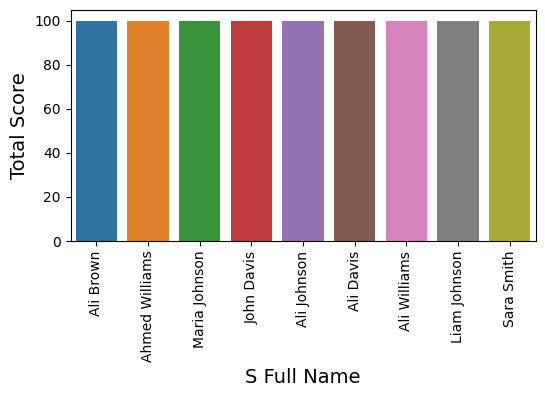

In [71]:
plt.figure(figsize=(6,3))
sns.barplot(x='S_Full_Name',y='Total_Score',data=top_10_S_Scores,estimator=np.mean,hue='S_Full_Name')
plt.ylabel('Total Score',fontsize=14)
plt.xlabel('S Full Name',fontsize=14)
plt.xticks(rotation=90)
plt.show()


### Top 10 Students in Terms of Total Score in Each Department

In [72]:
df['Department'].value_counts()

Department
CS             2022
Engineering    1469
Business       1006
Mathematics     503
Name: count, dtype: int64

In [73]:
def  plot_bar(x,y,data,hue,title,estimator):

    sns.barplot(x=x,y=y,data=data,hue=hue,estimator=estimator)
    plt.title(title,fontsize=14,color='k')
    plt.xlabel(x,fontsize=14,color='k')
    plt.ylabel(y,fontsize=14,color='k')

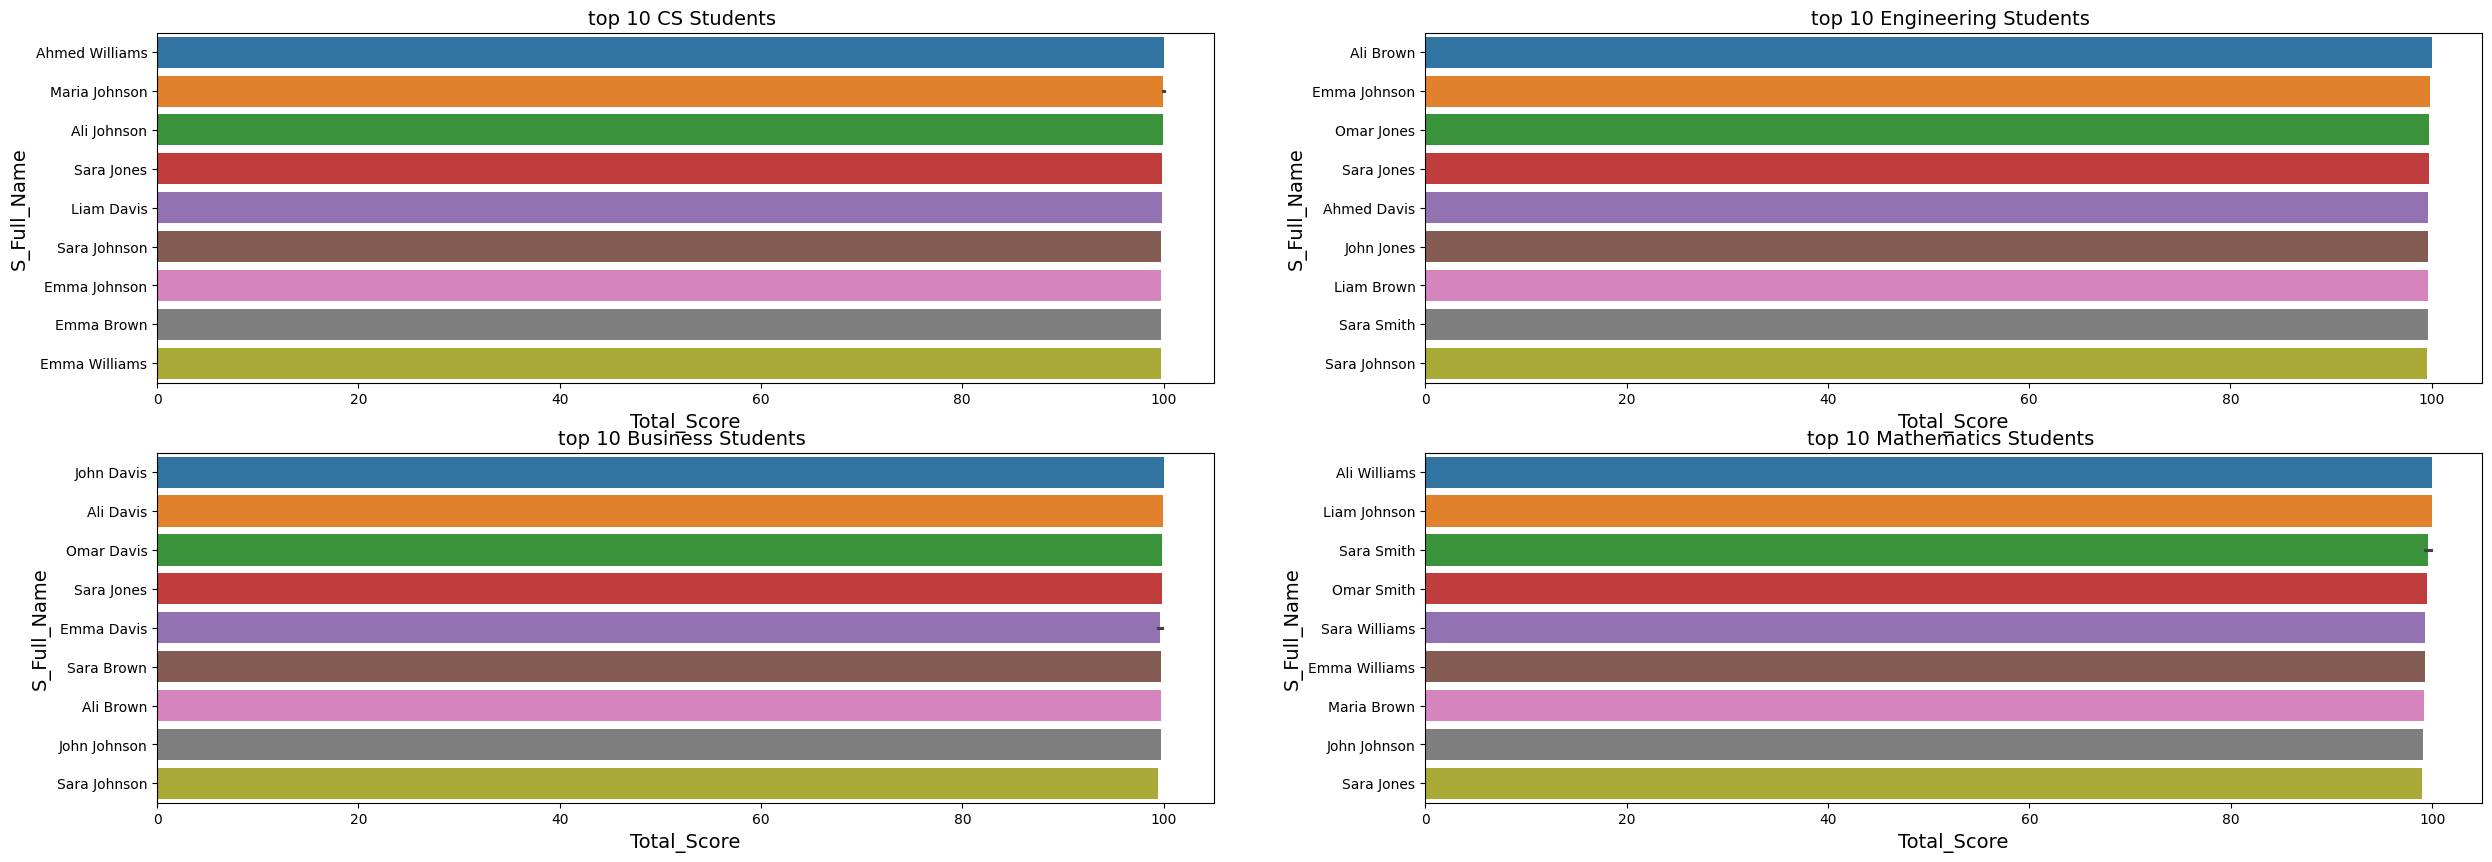

In [74]:
plt.figure(figsize=(30,10))

plt.subplot(2,2,1)
top_10_s_CS=df.query("Department=='CS'").sort_values("Total_Score",ascending=False)[:10]
plot_bar(x='Total_Score',y='S_Full_Name',data=top_10_s_CS,hue='S_Full_Name',title='top 10 CS Students ',estimator=np.mean)

plt.subplot(2,2,2)
top_10_s_Engineering=df.query("Department=='Engineering'").sort_values("Total_Score",ascending=False)[:10]
plot_bar(x='Total_Score',y='S_Full_Name',data=top_10_s_Engineering,hue='S_Full_Name',title='top 10 Engineering Students ',estimator=np.mean)


plt.subplot(2,2,3)
top_10_s_Business=df.query("Department=='Business'").sort_values("Total_Score",ascending=False)[:10]
plot_bar(x='Total_Score',y='S_Full_Name',data=top_10_s_Business,hue='S_Full_Name',title='top 10 Business Students ',estimator=np.mean)


plt.subplot(2,2,4)
top_10_s_Mathematics=df.query("Department=='Mathematics'").sort_values("Total_Score",ascending=False)[:10]
plot_bar(x='Total_Score',y='S_Full_Name',data=top_10_s_Mathematics,hue='S_Full_Name',title='top 10 Mathematics Students ',estimator=np.mean)


## Top 10 Students with the Highest Stress Level


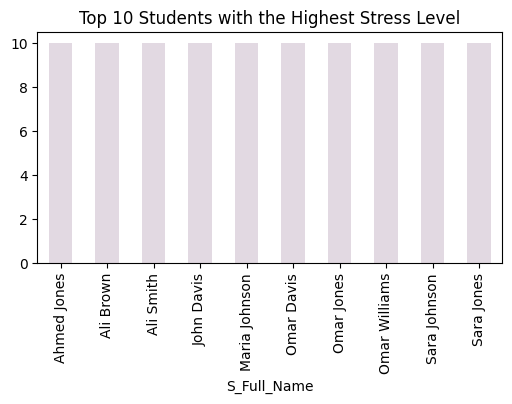

In [76]:
top_10_Stress=df.sort_values('Stress_Level (1-10)',ascending=False)[:10]
top_10_Stress=top_10_Stress.groupby(top_10_Stress['S_Full_Name'])['Stress_Level (1-10)'].agg('mean')
top_10_Stress.plot(kind='bar',title='Top 10 Students with the Highest Stress Level',figsize=(6,3),colormap='twilight')
plt.show()

### Top 10 Students Studying the Most Per Week

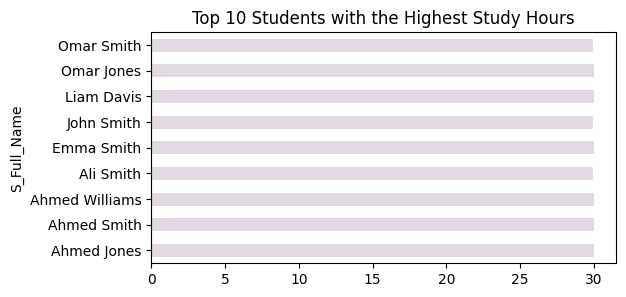

In [77]:
top_10_Study=df.sort_values('Study_Hours_per_Week',ascending=False)[:10]
top_10_Study=top_10_Study.groupby(top_10_Study['S_Full_Name'])['Study_Hours_per_Week'].agg('mean')
top_10_Study.plot(kind='barh',title='Top 10 Students with the Highest Study Hours',figsize=(6,3),colormap='twilight')
plt.show()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Bi-Visualization</b></div>

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Relations Between Total Score and Other Factors</b></div>

In [78]:
def plot_scatter(x,y,data,title):
    sns.scatterplot(x=x,y=y,data=data)
    plt.title(title,fontsize=14,color='k')
    plt.xlabel(x,fontsize=14,color='k')
    plt.ylabel(y,fontsize=14,color='k')


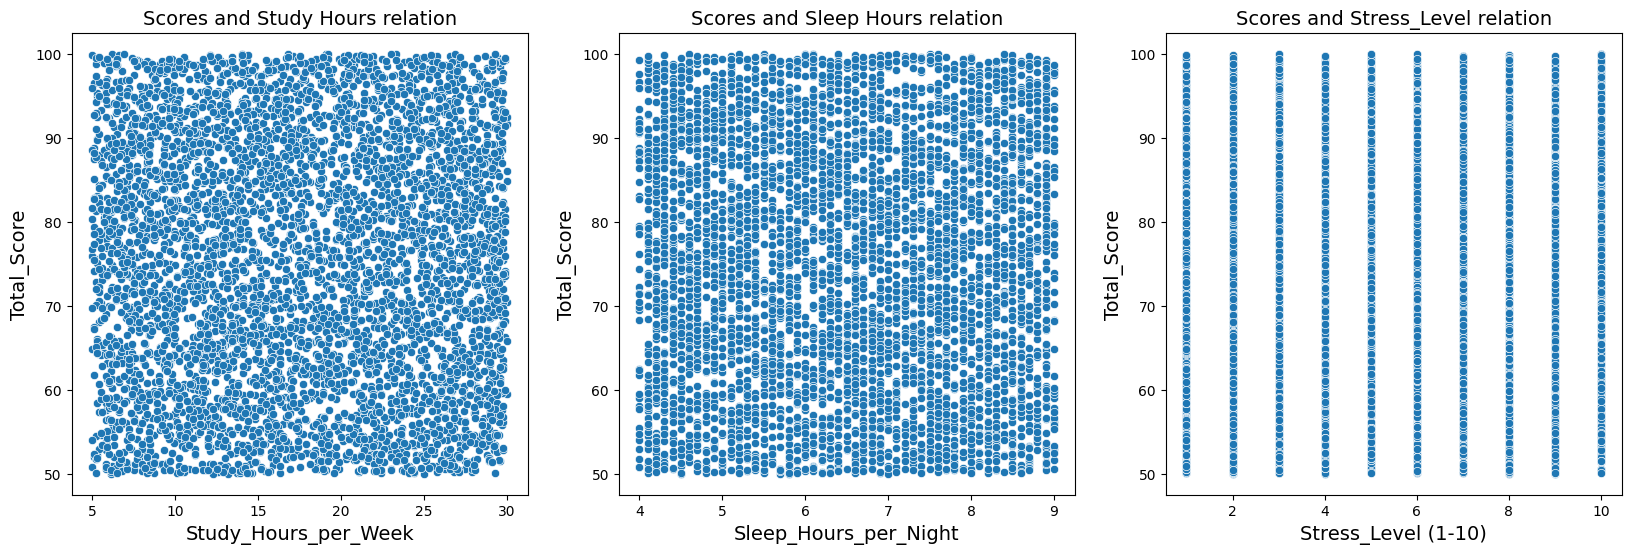

In [79]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plot_scatter(x='Study_Hours_per_Week',y='Total_Score',data=df,title='Scores and Study Hours relation')

plt.subplot(1,3,2)
plot_scatter(x='Sleep_Hours_per_Night',y='Total_Score',data=df,title='Scores and Sleep Hours relation')

plt.subplot(1,3,3)
plot_scatter(x='Stress_Level (1-10)',y='Total_Score',data=df,title='Scores and Stress_Level relation')

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Parent Education & Gender Distributions</b></div>

### Count of Parent Education Level in Each Department

In [81]:
df.pivot_table(index='Department',columns='Parent_Education_Level',values='Student_ID',aggfunc='count')

Parent_Education_Level  Bachelor's  High School  Master's  PhD
Department                                                    
Business                       264          243       258  241
CS                             490          507       503  522
Engineering                    362          351       358  398
Mathematics                    121          121       123  138

### Count of  Gender in Each Department

In [82]:
df.pivot_table(index='Department',columns='Gender',values='Student_ID',aggfunc='count')


Gender       Female  Male
Department               
Business        490   516
CS             1005  1017
Engineering     705   764
Mathematics     249   254

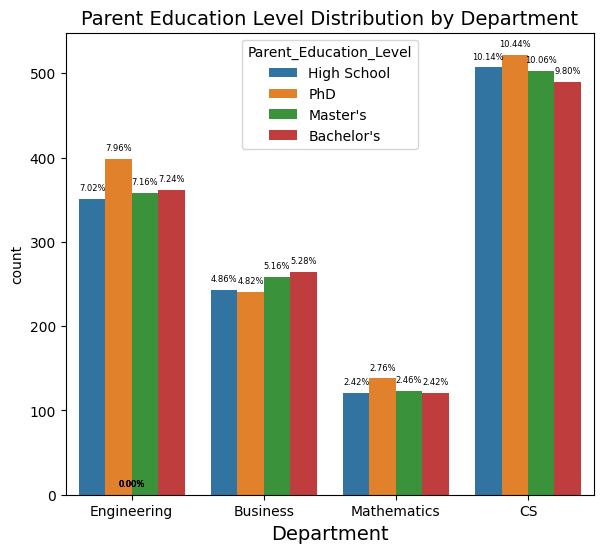

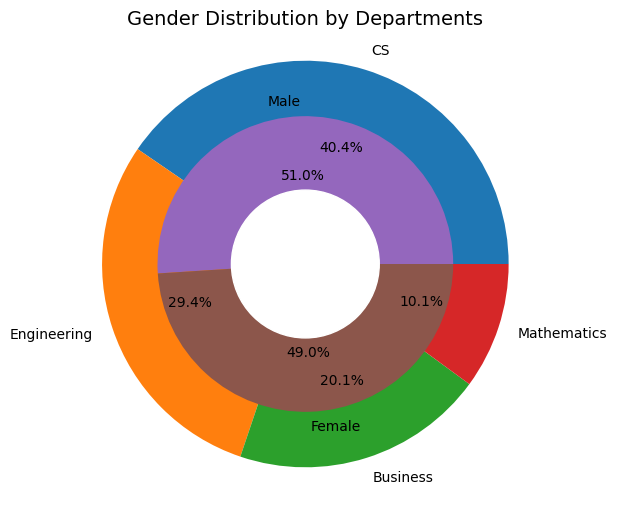

In [83]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_count(x='Department',data=df,hue='Parent_Education_Level',title="Parent Education Level Distribution by Department")



# plot_count(x='Department',data=df,hue='Gender',title="Gender Distribution by Department")
fig,ax=plt.subplots(figsize=(15,6))
ax.pie(Dep_Des.values.squeeze(),labels=Dep_Des.index,autopct="%1.1f%%",radius=1.1)
ax.pie(Gend_Des.values.squeeze(),labels=Gend_Des.index,autopct="%1.1f%%",radius=0.8)
ax.add_artist(plt.Circle((0,0),0.4,color='white'))
plt.title("Gender Distribution by Departments",fontsize=14)
plt.show()

### Student Distribution in Terms of Parent Education Level for Each Family Income Level

In [84]:
df.pivot_table(index='Parent_Education_Level',columns='Family_Income_Level',values='Student_ID',aggfunc='count')


Family_Income_Level     High  Low  Medium
Parent_Education_Level                   
Bachelor's               257  471     509
High School              264  476     482
Master's                 253  510     479
PhD                      270  526     503

### Student Distribution in Terms of Family Income Level for Each Extracurricular Activities

In [85]:
def plot_count_h(ax,title):
    for p in ax.patches:
        val=p.get_width()
        x_pos=p.get_x()+ p.get_width()
        y_pos=p.get_y()+ p.get_height()/2
        ax.annotate(round(val,2),(x_pos,y_pos)) ## add text annotion in x,y places after rounding the value to 2 decimal places
        plt.title(title,fontsize=14)





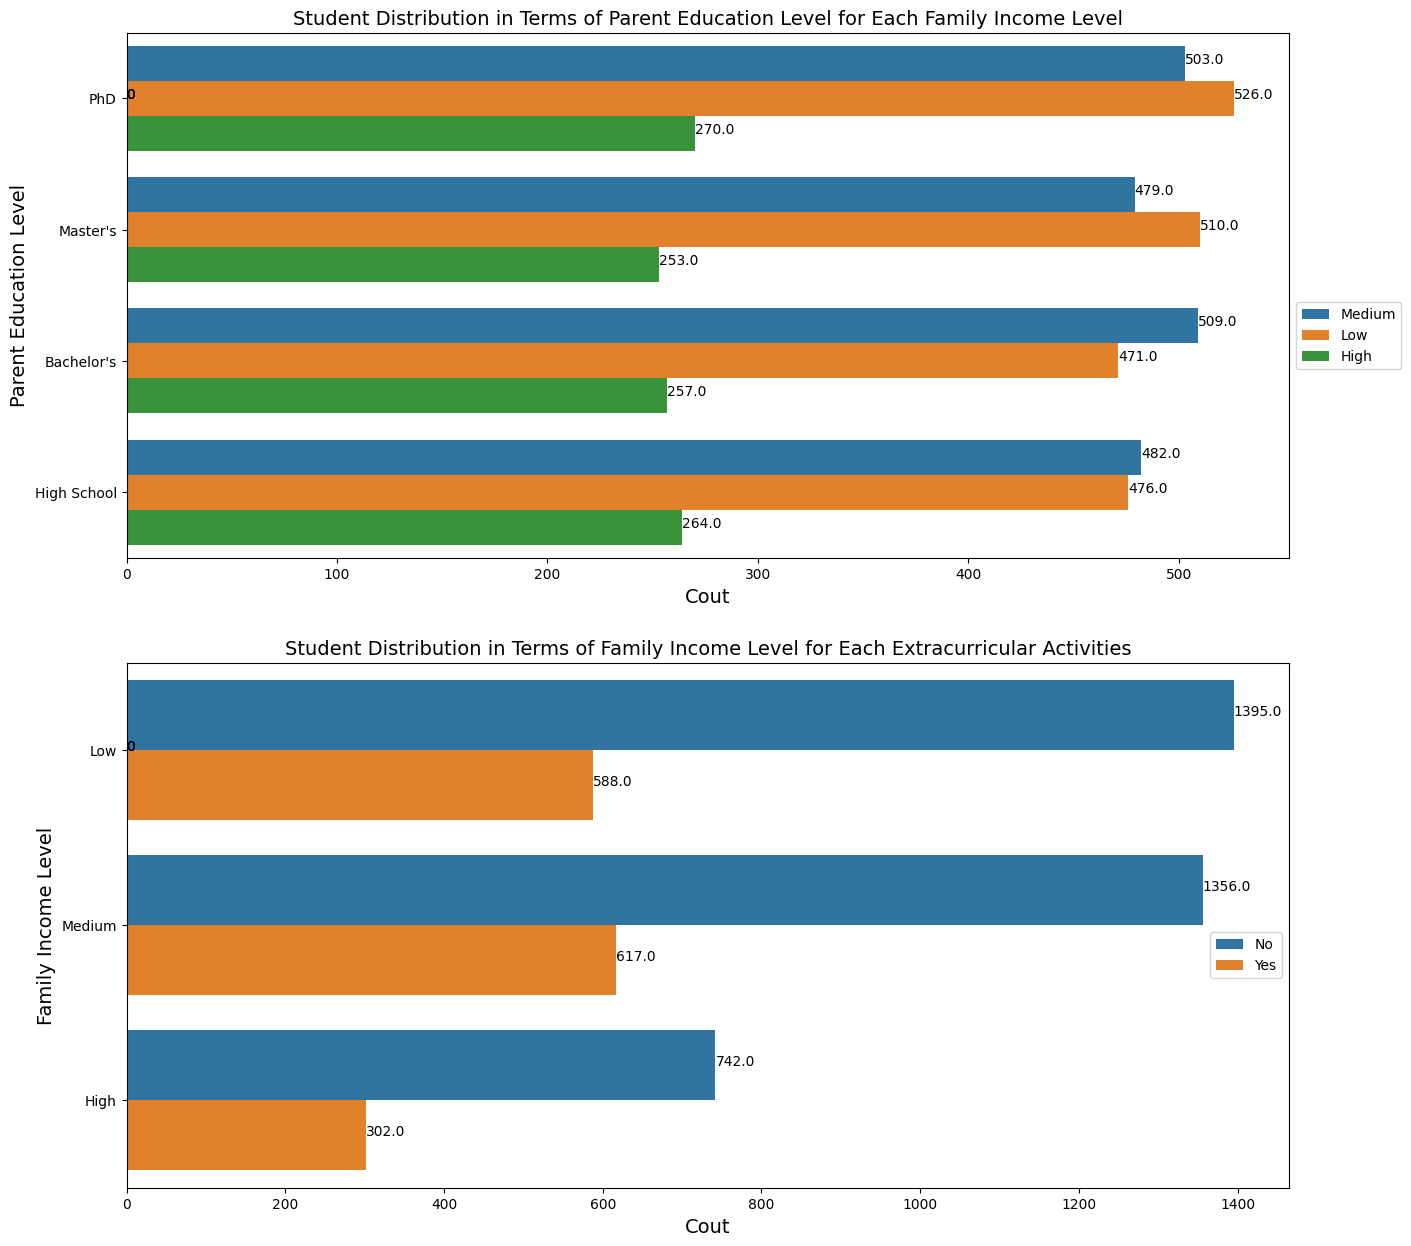

In [86]:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
ax0=sns.countplot(y='Parent_Education_Level',data=df,hue='Family_Income_Level',order=df['Parent_Education_Level'].value_counts().index)
plt.xlabel("Cout",fontsize=14,color='k')
plt.ylabel("Parent Education Level",fontsize=14,color='k')
plot_count_h(ax0,title='Student Distribution in Terms of Parent Education Level for Each Family Income Level')
plt.legend(bbox_to_anchor=(1, 0.5))

plt.subplot(2,1,2)
ax0=sns.countplot(y='Family_Income_Level',data=df,hue='Extracurricular_Activities',order=df['Family_Income_Level'].value_counts().index)
plt.xlabel("Cout",fontsize=14,color='k')
plt.ylabel("Family Income Level",fontsize=14,color='k')
plot_count_h(ax0,title='Student Distribution in Terms of Family Income Level for Each Extracurricular Activities')
plt.legend(bbox_to_anchor=(1, 0.5))


plt.show()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Influence of Department on Total Score Relations</b></div>

### Relation Between Total Score and Study Hours per Week by Each Department

<Figure size 1000x300 with 0 Axes>

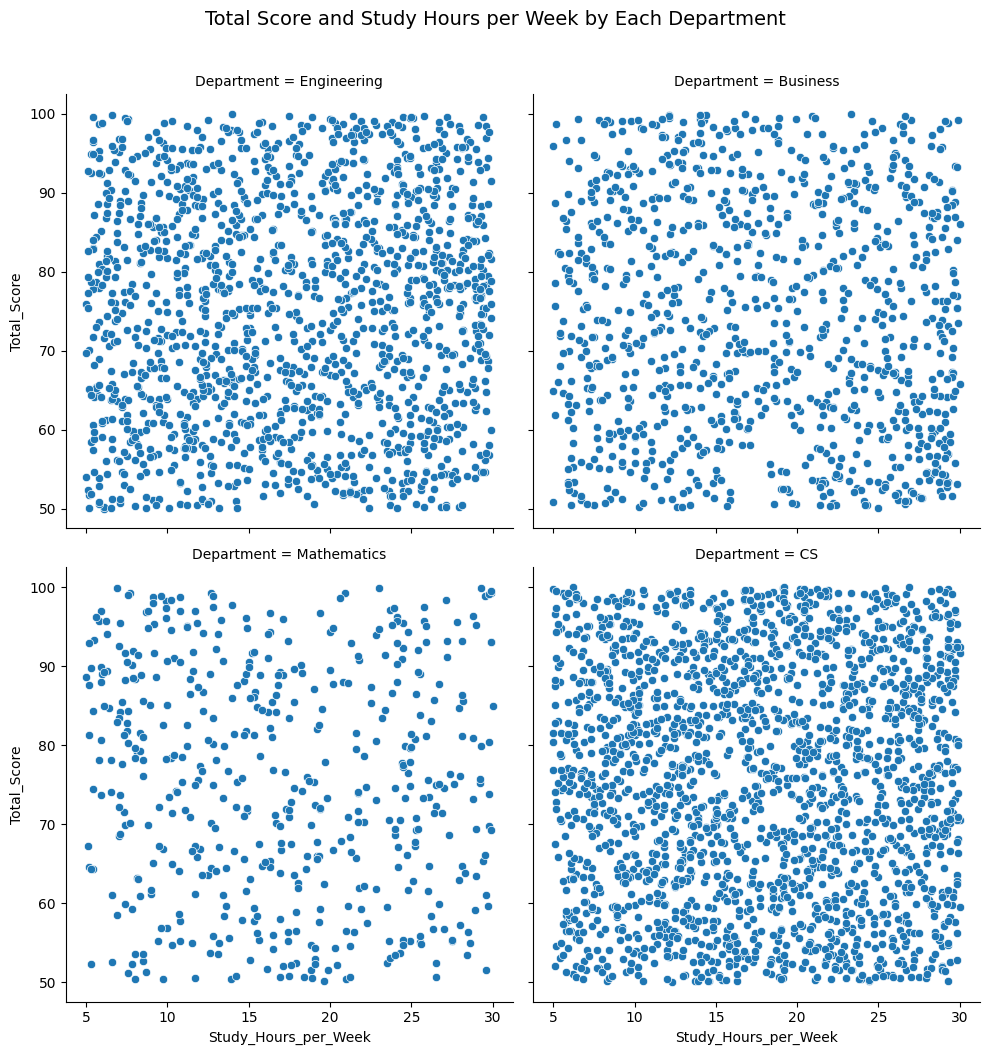

In [87]:
plt.figure(figsize=(10,3))

sns.relplot(x='Study_Hours_per_Week',y='Total_Score',data=df,kind='scatter',col='Department',col_wrap=2)
plt.suptitle('Total Score and Study Hours per Week by Each Department',fontsize=14,x=0.5,y=1.05,ha='center')
plt.show()

### Relation Between Total Score and Sleep Hours per Night by Each Department

<Figure size 1000x300 with 0 Axes>

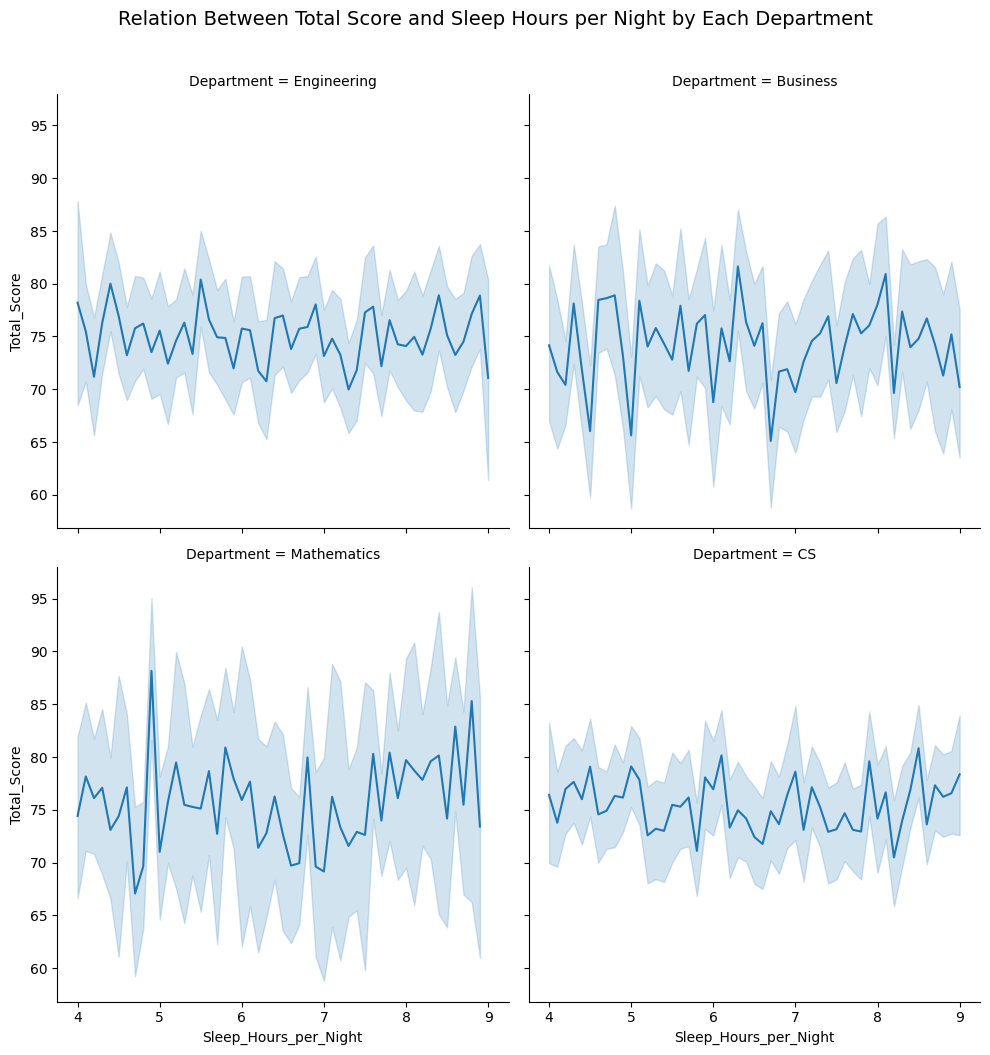

In [88]:
plt.figure(figsize=(10,3))

sns.relplot(x='Sleep_Hours_per_Night',y='Total_Score',data=df,kind='line',col='Department',col_wrap=2);
plt.suptitle('Relation Between Total Score and Sleep Hours per Night by Each Department',fontsize=14,x=0.5,y=1.05,ha='center')
plt.show()

### Average Total Scores for Each Gender by Department

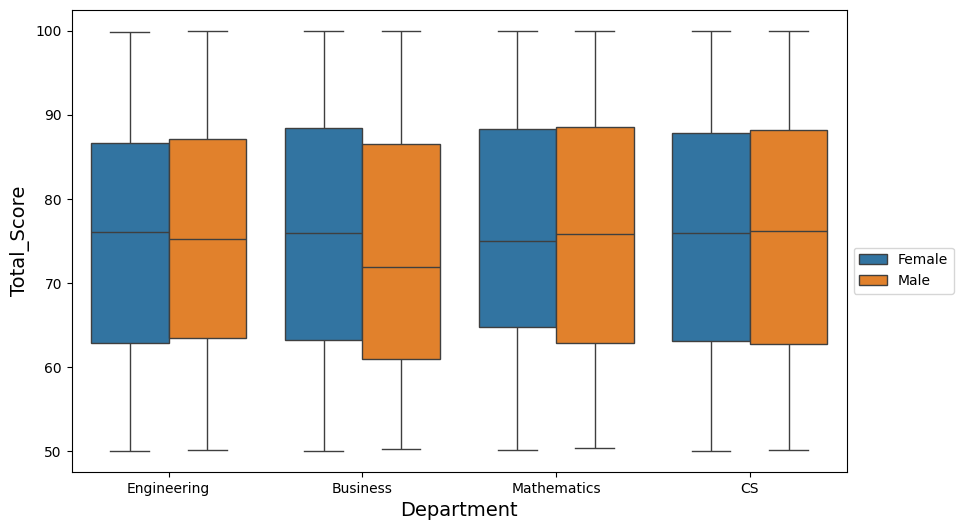

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Department',y='Total_Score',data=df,hue='Gender')
plt.xlabel("Department",fontsize=14,color='k')
plt.ylabel("Total_Score",fontsize=14,color='k')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Distribution of Grades by Different Factors</b></div>

### Distribution of Grades in Terms of Gender, Internet Access at Home, Parent Education Level, and Family Income Level

Text(0.5, 1.0, 'Family Income Level Distribution by Grade')

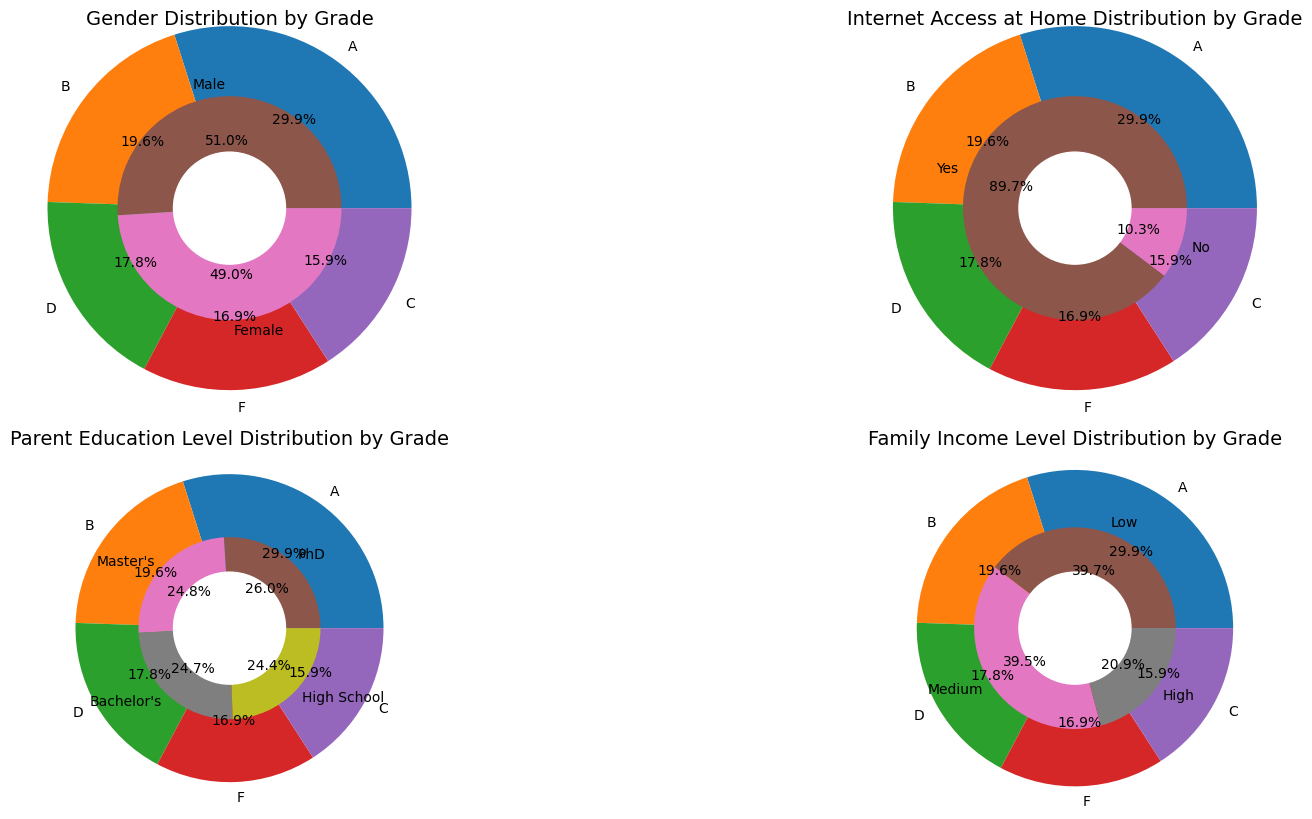

In [90]:
#Gender Distribution by Grade
fig,ax=plt.subplots(2,2,figsize=(20,10))
ax[0][0].pie(df['Grade'].value_counts().values,labels=df['Grade'].value_counts().index,autopct='%1.1f%%',radius=1.3)
ax[0][0].pie(df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index,autopct='%1.1f%%',radius=0.8)
ax[0][0].add_artist(plt.Circle((0,0),0.4,color='white'))
ax[0][0].set_title("Gender Distribution by Grade",fontsize=14)

#Internet Access at Home Distribution by Grade

ax[0][1].pie(df['Grade'].value_counts().values,labels=df['Grade'].value_counts().index,autopct='%1.1f%%',radius=1.3)
ax[0][1].pie(df['Internet_Access_at_Home'].value_counts().values,labels=df['Internet_Access_at_Home'].value_counts().index,autopct='%1.1f%%',radius=0.8)
ax[0][1].add_artist(plt.Circle((0,0),0.4,color='white'))
ax[0][1].set_title("Internet Access at Home Distribution by Grade",fontsize=14)

#Parent Education Level Distribution by Grade
ax[1][0].pie(df['Grade'].value_counts().values,labels=df['Grade'].value_counts().index,autopct='%1.1f%%',radius=1.1)
ax[1][0].pie(df['Parent_Education_Level'].value_counts().values,labels=df['Parent_Education_Level'].value_counts().index,autopct='%1.1f%%',radius=0.65)
ax[1][0].add_artist(plt.Circle((0,0),0.4,color='white'))
ax[1][0].set_title("Parent Education Level Distribution by Grade",fontsize=14)

#Family Income Level Distribution by Grade
ax[1][1].pie(df['Grade'].value_counts().values,labels=df['Grade'].value_counts().index,autopct='%1.1f%%',radius=1.13)
ax[1][1].pie(df['Family_Income_Level'].value_counts().values,labels=df['Family_Income_Level'].value_counts().index,autopct='%1.1f%%',radius=0.72)
ax[1][1].add_artist(plt.Circle((0,0),0.4,color='white'))
ax[1][1].set_title("Family Income Level Distribution by Grade",fontsize=14)


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Relations Between Stress Level and Other Factors</b></div>

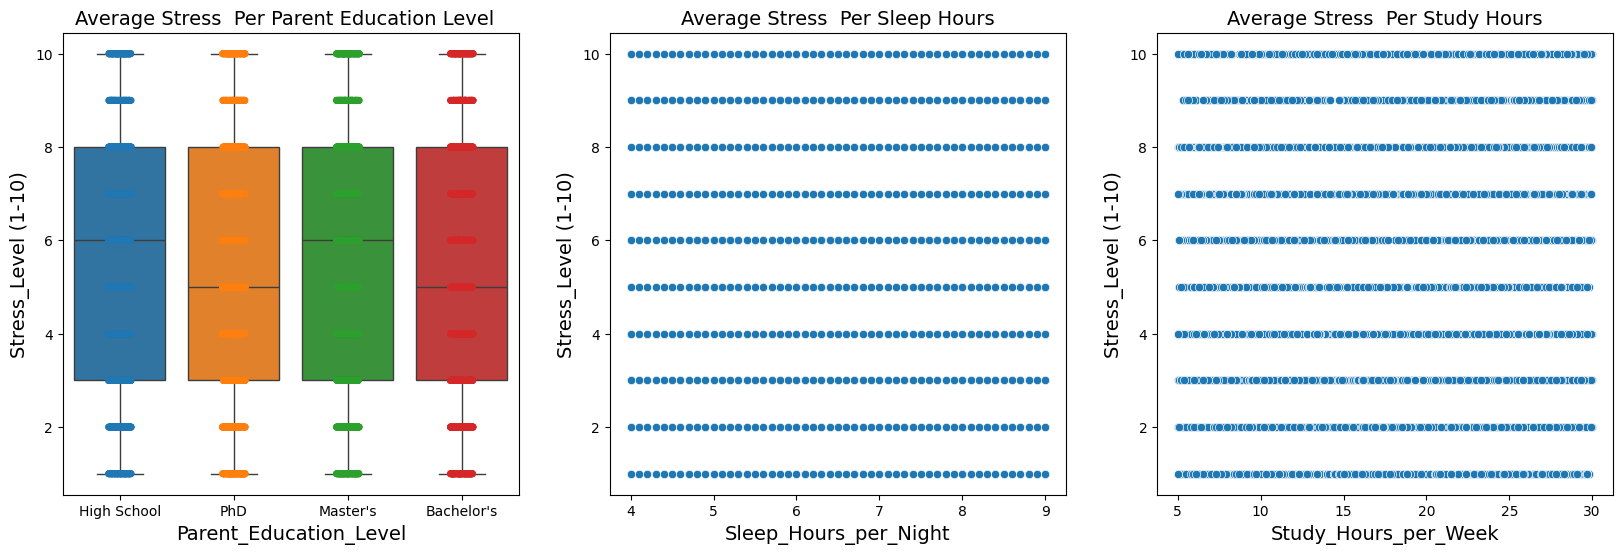

In [91]:
plt.figure(figsize=(20,6))


plt.subplot(1,3,1)
plot_box(x='Parent_Education_Level',y='Stress_Level (1-10)',data=df,hue='Parent_Education_Level',title='Average Stress  Per Parent Education Level  ')

plt.subplot(1,3,2)
plot_scatter(x='Sleep_Hours_per_Night',y='Stress_Level (1-10)',data=df,title='Average Stress  Per Sleep Hours')

plt.subplot(1,3,3)
plot_scatter(x='Study_Hours_per_Week',y='Stress_Level (1-10)',data=df,title='Average Stress  Per Study Hours')


### Stress Level Density Relation with Total Score

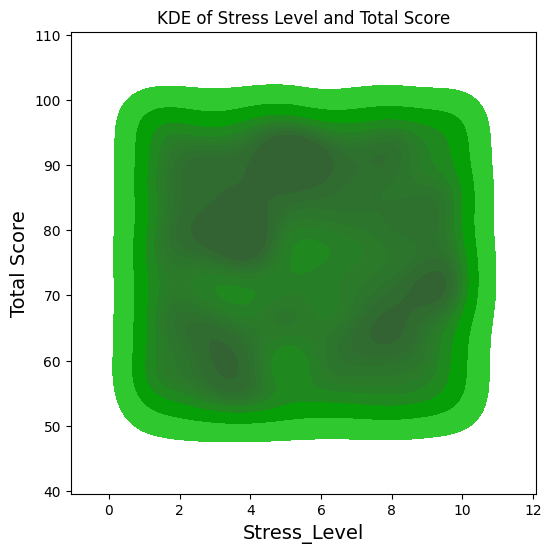

In [92]:
plt.figure(figsize=(6,6))

sns.kdeplot(x='Stress_Level (1-10)',y="Total_Score",data=df,fill=True,color='g')
plt.title('KDE of Stress Level and Total Score')
plt.xlabel("Stress_Level",fontsize=14,color='k')
plt.ylabel("Total Score",fontsize=14,color='k')
plt.show()

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Multi-Visualization</b></div>

<Figure size 600x600 with 0 Axes>

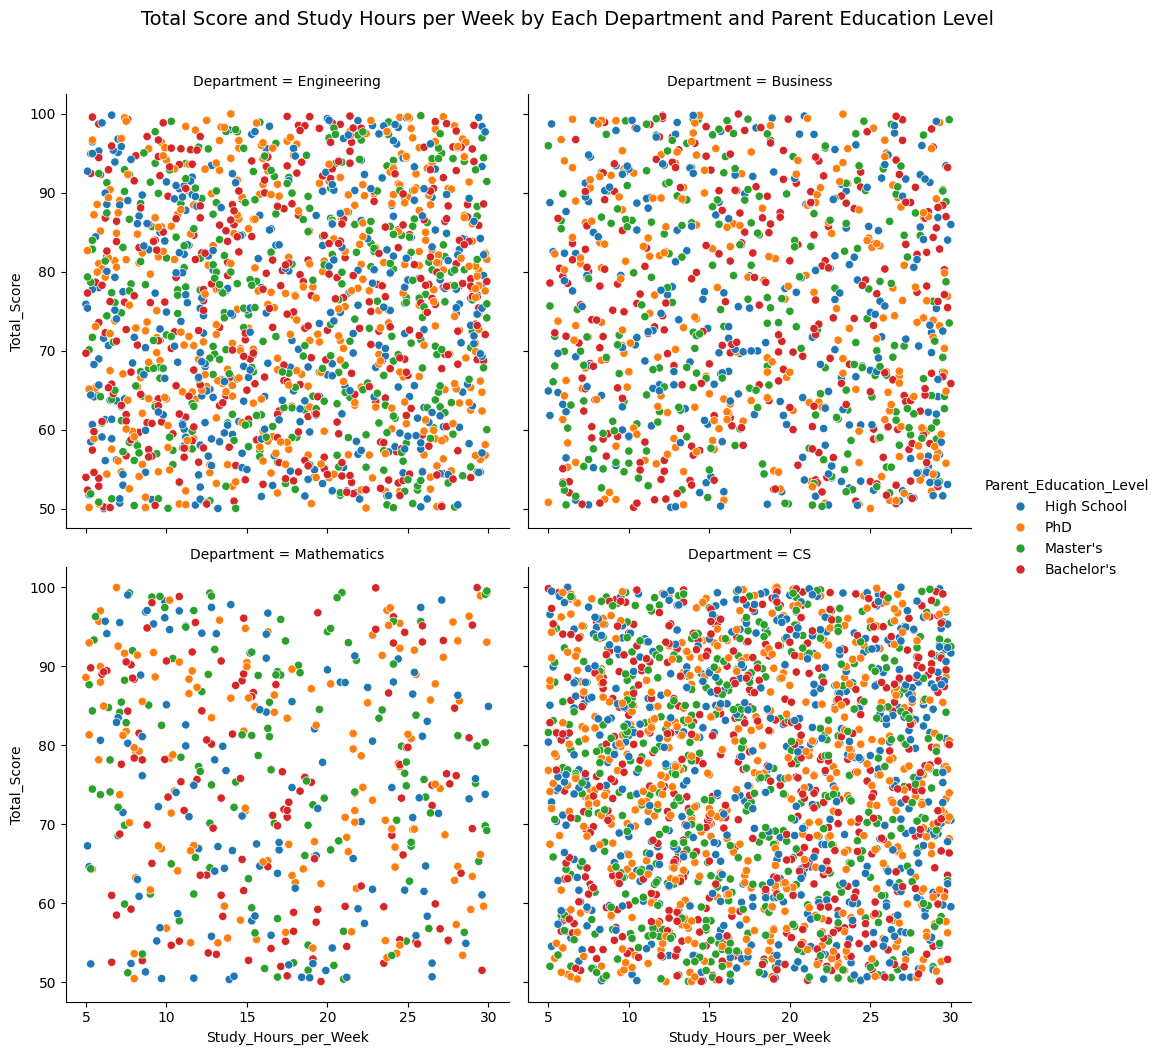

In [93]:
plt.figure(figsize=(6,6))

sns.relplot(x='Study_Hours_per_Week',y='Total_Score',data=df,kind='scatter',col='Department',col_wrap=2,hue='Parent_Education_Level')
plt.suptitle('Total Score and Study Hours per Week by Each Department and Parent Education Level ',fontsize=14,x=0.5,y=1.05,ha='center')
plt.show()


<Figure size 600x600 with 0 Axes>

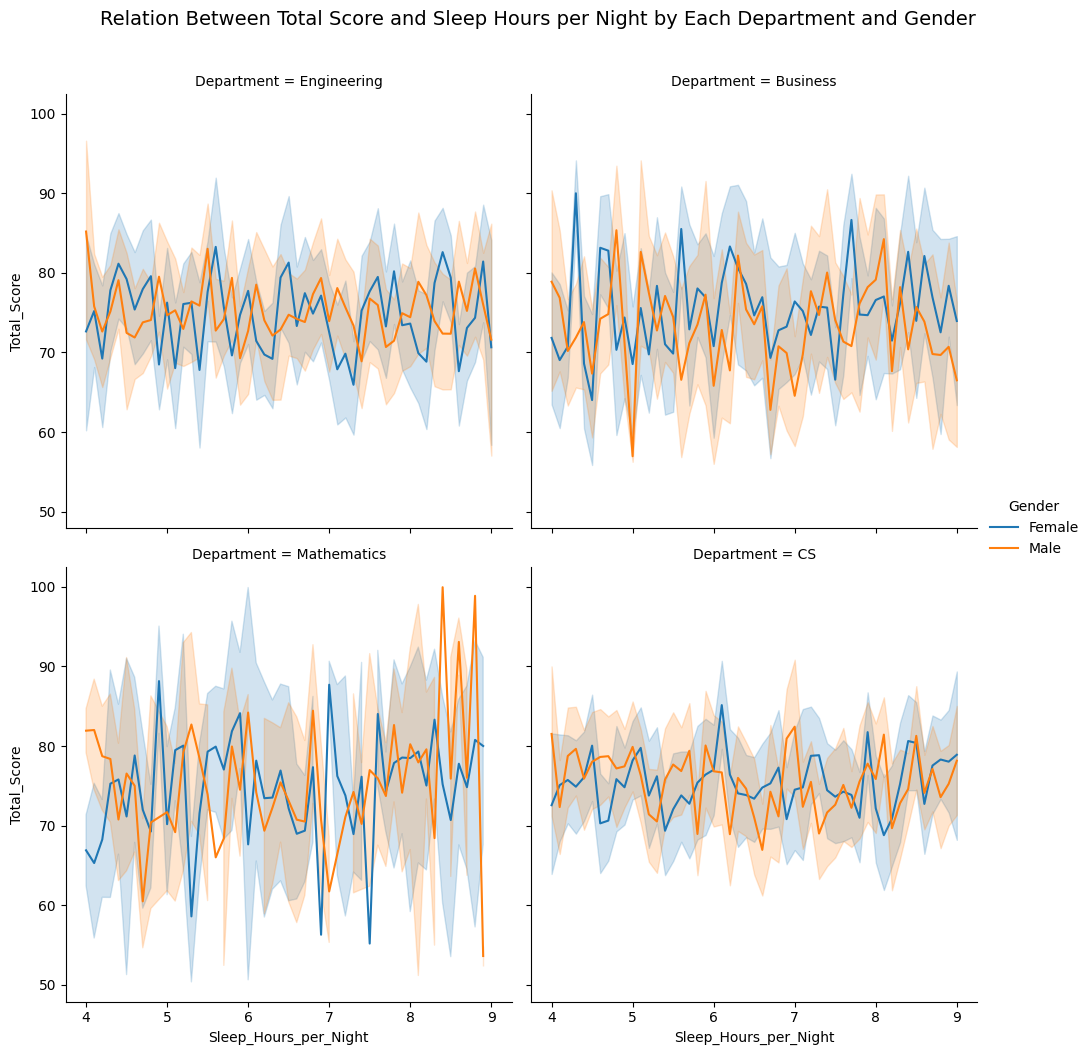

In [94]:
plt.figure(figsize=(6,6))

sns.relplot(x='Sleep_Hours_per_Night',y='Total_Score',data=df,kind='line',col='Department',col_wrap=2,hue='Gender');
plt.suptitle('Relation Between Total Score and Sleep Hours per Night by Each Department and Gender',fontsize=14,x=0.5,y=1.05,ha='center')
plt.show()

<Figure size 600x600 with 0 Axes>

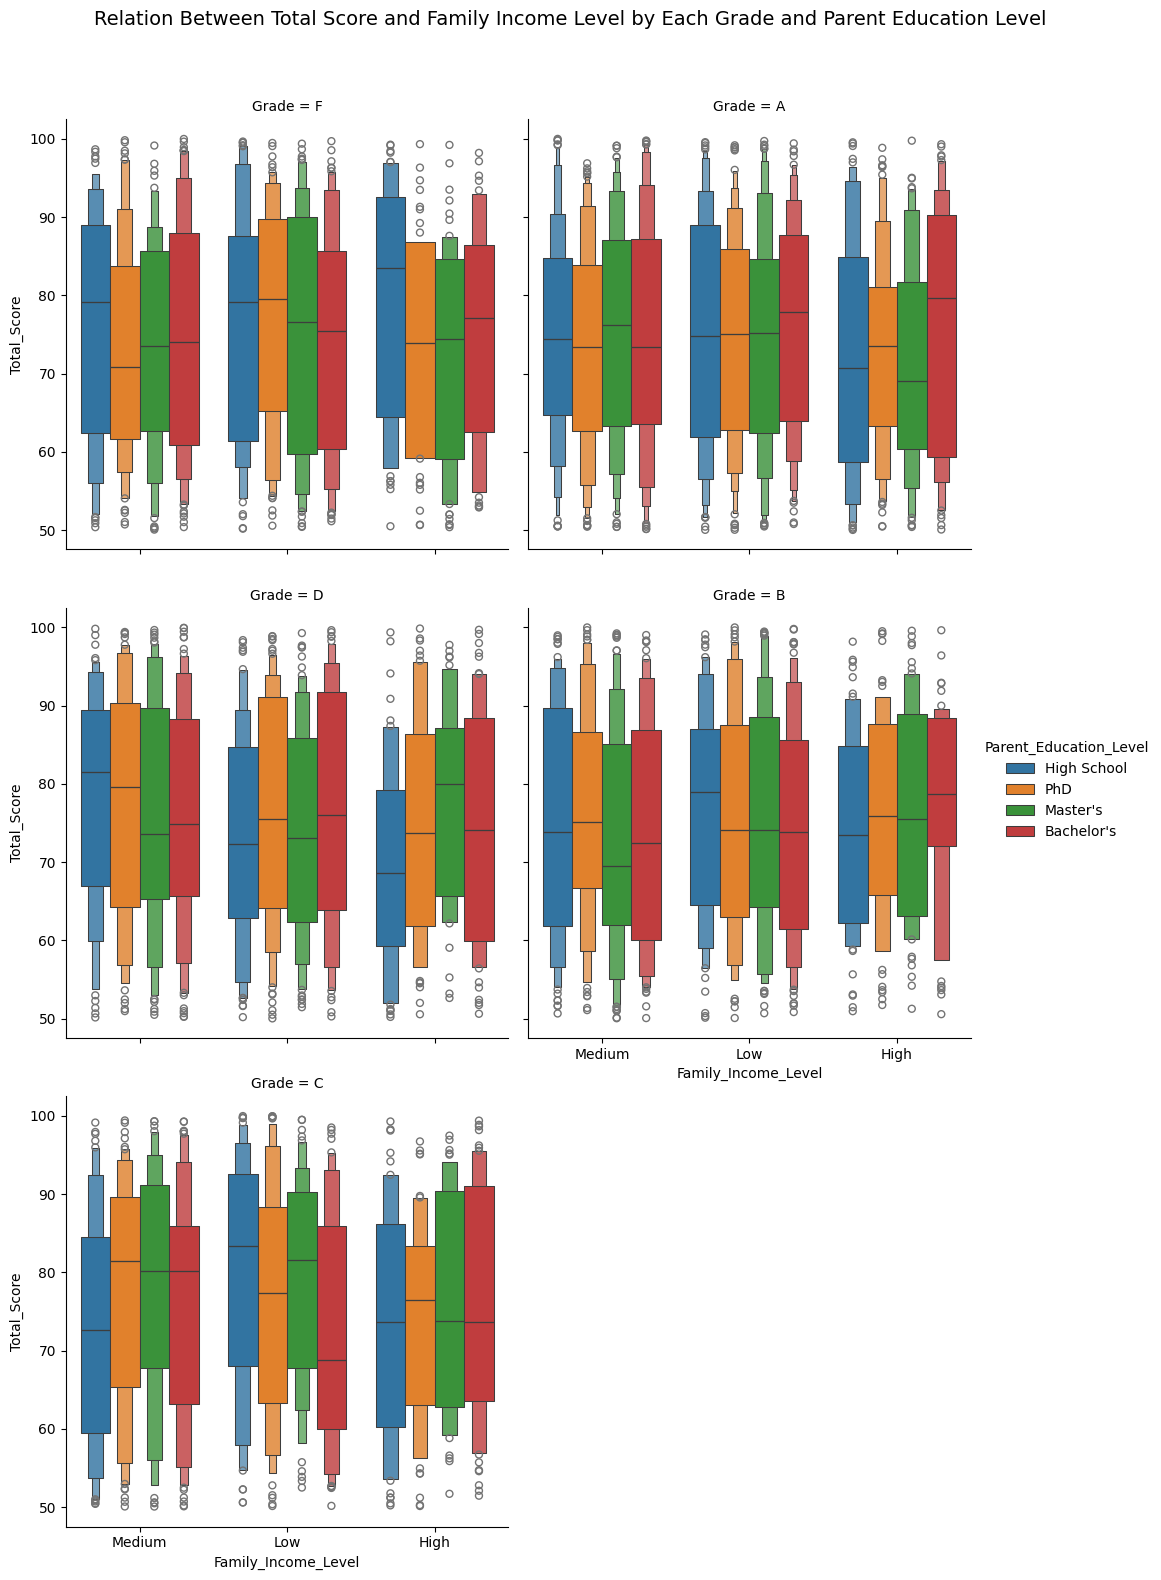

In [95]:
plt.figure(figsize=(6,6))

sns.catplot(x='Family_Income_Level',y='Total_Score',data=df,kind='boxen',col='Grade',col_wrap=2,hue='Parent_Education_Level');
plt.suptitle('Relation Between Total Score and Family Income Level by Each Grade and Parent Education Level',fontsize=14,x=0.5,y=1.05,ha='center')
plt.show()

In [96]:
df['Grade'].value_counts()

Grade
A    1495
B     978
D     889
F     844
C     794
Name: count, dtype: int64

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Checking The Correlation</b></div>

In [97]:
Grade_mapping={"A" :4,
               "B" :3,
               "C" :2,
               "D" :1,
               "F" :0,
               }

df['Grade']=df['Grade'].map(Grade_mapping)

In [98]:
df.corr(numeric_only=True)['Grade'].sort_values(ascending=False)

Grade                    1.000000
Attendance (%)           0.573077
Stress_Level (1-10)      0.024795
Study_Hours_per_Week     0.002596
Projects_Score          -0.013770
Midterm_Score           -0.014109
Participation_Score     -0.017419
Sleep_Hours_per_Night   -0.018178
Age                     -0.018937
Total_Score             -0.023628
Assignments_Avg         -0.026026
Final_Score             -0.028252
Quizzes_Avg             -0.029829
Name: Grade, dtype: float64

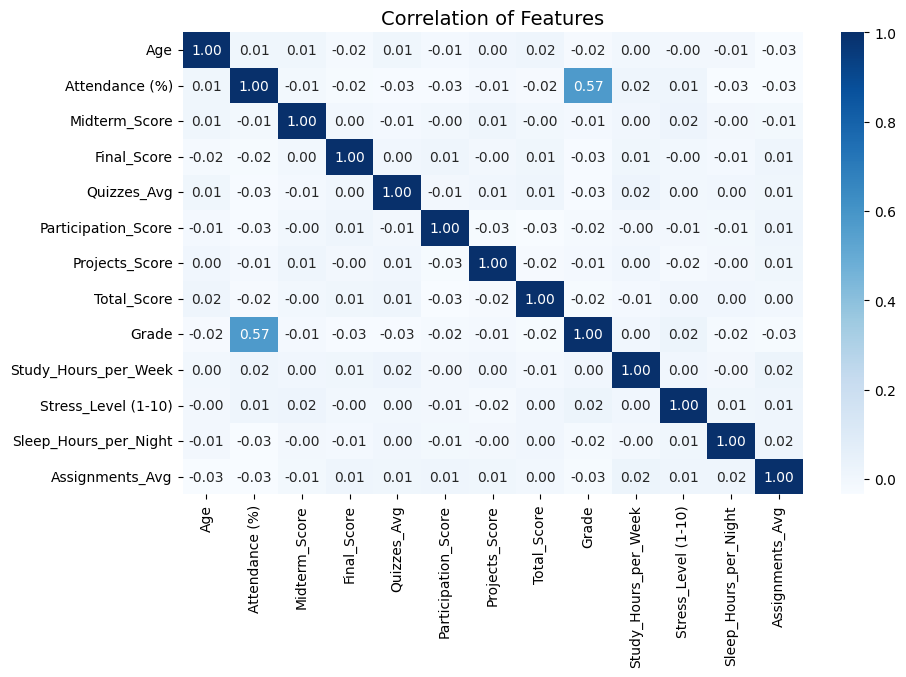

In [99]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Blues",fmt=".2f")
plt.title("Correlation of Features",fontsize=14,c='k')
plt.show()

# <a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#15f173 ; overflow:hidden"><b>Splititng The Data</b></div>

In [101]:
X=df.drop(['Student_ID', 'First_Name', 'Last_Name', 'Email','Grade','S_Full_Name'], axis=1)
y=df['Grade']

In [102]:
print(f'X Data Shape is : {X.shape}')
print(f'y Data Shape is : {y.shape}')



X Data Shape is : (5000, 18)
y Data Shape is : (5000,)


In [103]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [104]:
print(f'X train Shape is : {X_train.shape}')
print(f'y train Shape is : {y_train.shape}')
print(f'x test Shape is : {X_test.shape}')
print(f'y test Shape is : {y_test.shape}')



X train Shape is : (4000, 18)
y train Shape is : (4000,)
x test Shape is : (1000, 18)
y test Shape is : (1000,)


In [105]:
# smote=SMOTE(sampling_strategy='auto',random_state=42)
# X_train,y_train=smote.fit_resample(X_train,y_train)

# Separating Numerical & Categorical Features

In [106]:
num_col=[col for col in X_train.columns if X_train[col].dtype in ["int32","int64","float32","float64"]]  # Numerical Features
cat_col=[col for col in X_train.columns if X_train[col].dtype not in ["int32","int64","float32","float64"]]  # Categorical Features

In [107]:
num_col,cat_col

(['Age',
  'Attendance (%)',
  'Midterm_Score',
  'Final_Score',
  'Quizzes_Avg',
  'Participation_Score',
  'Projects_Score',
  'Total_Score',
  'Study_Hours_per_Week',
  'Stress_Level (1-10)',
  'Sleep_Hours_per_Night',
  'Assignments_Avg'],
 ['Gender',
  'Department',
  'Extracurricular_Activities',
  'Internet_Access_at_Home',
  'Parent_Education_Level',
  'Family_Income_Level'])

In [108]:
num_pip=Pipeline([
    ('selector', DataFrameSelector(num_col)),   ## select numerical features only
    ('scaler', StandardScaler())

])

cat_pip=Pipeline(steps=[
    ('selector', DataFrameSelector(cat_col)),    ## select categorical features only
    ('OHE', OneHotEncoder(sparse_output=False))

])

tot_pip=FeatureUnion(transformer_list=[                       ## Collecting Them to one step
    ('num_pip',num_pip),
    ('cat_pip',cat_pip)
])

X_train=tot_pip.fit_transform(X_train)
X_test=tot_pip.transform(X_test)

In [109]:
pd.DataFrame(X_train).head()

0         1         2         3         4         5         6   \
0  0.987815  1.682734  0.620807  1.114968  1.430968  1.015331  0.474494   
1  0.987815  1.175771 -0.639082  1.175746 -1.141852 -0.597627  1.152266   
2  1.490200  1.025586 -0.731241 -1.625837  0.814686  0.666490 -0.043191   
3 -1.524111  0.861483 -0.363773  0.967364  0.818160 -0.504372  0.431527   
4  1.490200  1.607276  1.478815  1.073871 -0.874357  0.214033  0.390638   

         7         8         9   ...   19   20   21   22   23   24   25   26  \
0 -1.082568 -1.112936 -1.230576  ...  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
1  0.174276 -0.740775 -1.580993  ...  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
2 -0.576058  0.803002 -1.230576  ...  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
3 -0.091205 -1.526448  0.871924  ...  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
4 -0.379043 -1.746987  1.572758  ...  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   

    27   28  
0  1.0  0.0  
1  0.0  1.0  
2  1.0  0.0  
3  0.0  1.0  
4  0.0  1.0  

[5 rows x 29 columns]

# Balancing Classes using SMOTE

In [110]:
smote=SMOTE(sampling_strategy='auto',random_state=42)
X_train,y_train=smote.fit_resample(X_train,y_train)         ## Now all Target classes are Equal number of A = number of B  ....

# Building models

In [111]:
models=[
    ("Logistic Regression" , LogisticRegression(multi_class='ovr',solver='liblinear')),
    ("Random forest" , RandomForestClassifier(n_estimators=100,random_state=42)),
    ("SVM" , SVC(kernel='linear',decision_function_shape='ovr')),
    ("Naive Bayes" , GaussianNB()),
    ("KNN" , KNeighborsClassifier(n_neighbors=3)),
    ("Decision Tree" , DecisionTreeClassifier(random_state=42)),
    ("AdaBoost" , AdaBoostClassifier(n_estimators=100,random_state=42)),
    ("Gradient Boost" , GradientBoostingClassifier(n_estimators=100,random_state=42)),
    ("MLP Classifier" , MLPClassifier(hidden_layer_sizes=(50,50),max_iter=500,random_state=42)),
    ("XGBOOST",XGBClassifier(objective='multi:softmax',num_class=5,random_state=42))
]

# Evaluation Models

In [112]:
def evaluate_model(model,X_test,y_test):
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred,average='weighted')
    recall=recall_score(y_test,y_pred,average='weighted')
    f1=f1_score(y_test,y_pred,average='weighted')
    return accuracy,precision,recall,f1

# Training Models

In [113]:
result=[]
for name,model in models:
    model.fit(X_train,y_train)
    accuracy,precision,recall,f1=evaluate_model(model,X_test,y_test)
    result.append([name,accuracy,precision,recall,f1])

# Models Results

In [114]:
result_df=pd.DataFrame(result,columns=['Model','Accuracy','Precision','Recal','F1 Score'])
result_df

Model  Accuracy  Precision  Recal  F1 Score
0  Logistic Regression     0.360   0.345979  0.360  0.351372
1        Random forest     0.360   0.360622  0.360  0.357882
2                  SVM     0.379   0.378673  0.379  0.378218
3          Naive Bayes     0.322   0.336792  0.322  0.327508
4                  KNN     0.254   0.321125  0.254  0.261324
5        Decision Tree     0.328   0.334161  0.328  0.330734
6             AdaBoost     0.376   0.312576  0.376  0.322385
7       Gradient Boost     0.339   0.353339  0.339  0.343600
8       MLP Classifier     0.307   0.314190  0.307  0.309897
9              XGBOOST     0.345   0.337535  0.345  0.340758

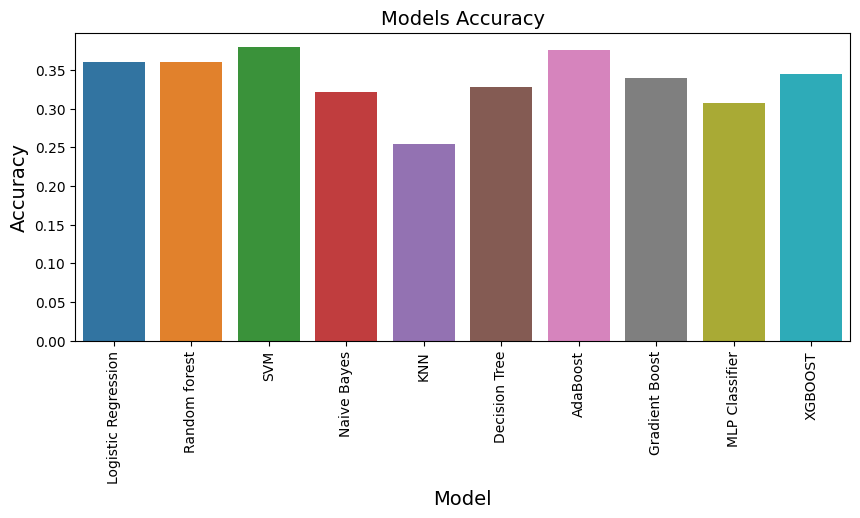

In [115]:
plt.figure(figsize=(10,4))

sns.barplot(x='Model',y='Accuracy',data=result_df,hue='Model')
plt.title("Models Accuracy",fontsize=14,color='k')
plt.xlabel("Model",fontsize=14,color='k')
plt.ylabel("Accuracy",fontsize=14,color='k')
plt.xticks(rotation=90)
plt.show()


# DNN




In [125]:
## Creat model
DNN_model=keras.models.Sequential([
    layers.Input(shape=(29,)),

    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(5,activation='softmax')



])
## Compile Model
DNN_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Model summery
DNN_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

# Training DNN Model

In [126]:
history=DNN_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=100,verbose=1,
                       callbacks=[tf.keras.callbacks.EarlyStopping(patience=10,monitor='val_accuracy',restore_best_weights=True)])

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.2371 - loss: 1.6042 - val_accuracy: 0.3240 - val_loss: 1.4497
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3430 - loss: 1.4095 - val_accuracy: 0.3530 - val_loss: 1.3865
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3780 - loss: 1.3459 - val_accuracy: 0.3450 - val_loss: 1.3910
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3849 - loss: 1.3403 - val_accuracy: 0.3510 - val_loss: 1.3876
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4068 - loss: 1.3175 - val_accuracy: 0.3490 - val_loss: 1.3983
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4120 - loss: 1.3061 - val_accuracy: 0.3340 - val_loss: 1.4007
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4321 - loss: 1.2793 - val_accuracy: 0.3620 - val_loss: 1.4007
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4519 - loss: 1.2738 - val_accuracy: 0.3520 - 

# Evaluation DNN Model

In [127]:
y_pred=DNN_model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [128]:
Model_Loss,Model_Accuracy=DNN_model.evaluate(X_test,y_test)
print(f' Model Loss is : {Model_Loss}')
print(f' Model Accuracy is : {Model_Accuracy}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3575 - loss: 1.4031
 Model Loss is : 1.4007090330123901
 Model Accuracy is : 0.3619999885559082


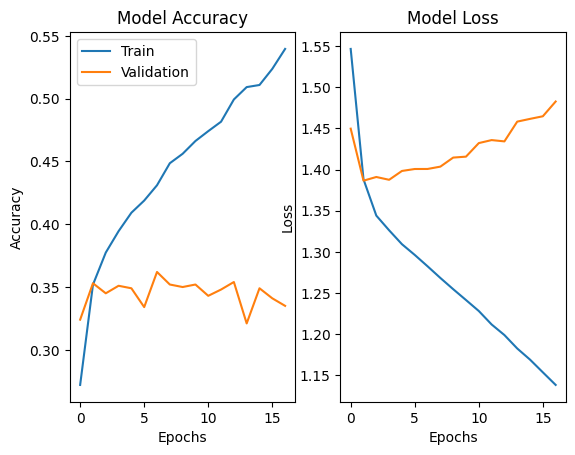

In [130]:
plt.subplot(1,2,1)

## Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])

plt.subplot(1,2,2)

## Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()